In [2]:
import pandas as pd
import glob

# Read all CSV files in the genre folder
genre_files = glob.glob("1_movies_per_genre/*.csv")

all_movies = []
for file in genre_files:
    df = pd.read_csv(file)
    df['genre_source'] = file.split("/")[-1].replace(".csv", "")  # to keep genre info from filename
    all_movies.append(df)
    
movies_df = pd.concat(all_movies, ignore_index=True)
print(movies_df.shape)
movies_df.head()

(1700, 11)


,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url,genre_source
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...,1_movies_per_genre\Action
1,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820,https://www.imdb.com/title/tt1375666/reviews/_...,1_movies_per_genre\Action
2,The Matrix,1999,R,2h 16min,Action; Sci-Fi;,31 March 1999 (USA),8.7,1619761,4281,https://www.imdb.com/title/tt0133093/reviews/_...,1_movies_per_genre\Action
3,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365,https://www.imdb.com/title/tt0120737/reviews/_...,1_movies_per_genre\Action
4,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979,https://www.imdb.com/title/tt1345836/reviews/_...,1_movies_per_genre\Action


In [3]:
movies_df = movies_df.drop(columns=['movie_rated', 'release_date', 'review_url', 'genre_source'], errors='ignore')
movies_df = movies_df.rename(columns={
    'rating': 'imdb_rating'
})

movies_df.head()

,name,year,run_length,genres,imdb_rating,num_raters,num_reviews
0,The Dark Knight,2008,2h 32min,Action; Crime; Drama;,9.0,2224522,6836
1,Inception,2010,2h 28min,Action; Adventure; Sci-Fi;,8.8,1981675,3820
2,The Matrix,1999,2h 16min,Action; Sci-Fi;,8.7,1619761,4281
3,The Lord of the Rings: The Fellowship of the Ring,2001,2h 58min,Action; Adventure; Drama;,8.8,1609165,5365
4,The Dark Knight Rises,2012,2h 44min,Action; Adventure;,8.4,1470329,2979


In [4]:
review_files = glob.glob("2_reviews_per_movie_raw/*.csv")

reviews = []
for file in review_files:
    df = pd.read_csv(file)
    df['movie_name'] = file.split("/")[-1].replace(".csv", "")
    reviews.append(df)
    
reviews_df = pd.concat(reviews, ignore_index=True)
print(reviews_df.shape)
reviews_df.head()

(795299, 8)


,username,rating,helpful,total,date,title,review,movie_name
0,Imme-van-Gorp,7,102,123,30 January 2019,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016
1,sonofocelot-1,5,385,500,10 May 2016,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016
2,mhodaee,5,110,143,4 August 2017,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016
3,fil-nik09,5,73,100,5 October 2016,Hmmm...\n,"First of all, I must say that I was expecting ...",2_reviews_per_movie_raw\10 Cloverfield Lane 2016
4,DVR_Brale,7,42,56,27 July 2016,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016


In [5]:
reviews_df = reviews_df.drop(columns=['date'], errors='ignore')
reviews_df = reviews_df.rename(columns={
    'rating': 'user_rating',
    'title': 'review_title'
})
import os
# Update the 'movie_name' column to remove the path and extension
reviews_df['movie_name'] = reviews_df['movie_name'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

import re
# Remove the year (4 digits at the end) and strip trailing spaces
reviews_df['movie_name_clean'] = reviews_df['movie_name'].apply(lambda x: re.sub(r'\s+\d{4}$', '', x).strip())

# lowercase for consistent matching
reviews_df['movie_name_clean'] = reviews_df['movie_name_clean'].str.lower().str.strip()
reviews_df = reviews_df.drop(columns=['movie_name'], errors='ignore')
reviews_df.head()

,username,user_rating,helpful,total,review_title,review,movie_name_clean
0,Imme-van-Gorp,7,102,123,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,10 cloverfield lane
1,sonofocelot-1,5,385,500,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,10 cloverfield lane
2,mhodaee,5,110,143,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,10 cloverfield lane
3,fil-nik09,5,73,100,Hmmm...\n,"First of all, I must say that I was expecting ...",10 cloverfield lane
4,DVR_Brale,7,42,56,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,10 cloverfield lane


In [6]:
# Step 1: Read the descriptions CSV
descriptions_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\netflix_titles.csv')
# Step 2: Clean the movie title in descriptions_df
descriptions_df['title_clean'] = descriptions_df['title'].str.strip().str.lower()
# Step 3: Clean the name in movies_df to match
movies_df['name_clean'] = movies_df['name'].str.strip().str.lower()
# Step 4: Merge on the cleaned titles
movies_df = pd.merge(movies_df, descriptions_df[['title_clean', 'description']], 
                     left_on='name_clean', right_on='title_clean', how='left')
# Step 5: Drop the extra 'title_clean' column
movies_df.drop(columns=['title_clean'], inplace=True)
movies_df.shape

C:\Users\Hp\AppData\Local\Temp\ipykernel_14540\1660642918.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  descriptions_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\netflix_titles.csv')


(1700, 9)

In [7]:
# Step 1: Read the overview CSV
overview_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\movies_metadata\\movies_metadata.csv')
# Step 2: Clean the movie title in overview_df
overview_df['title_clean'] = overview_df['original_title'].str.strip().str.lower()
# Step 3: Merge on the cleaned titles
movies_df = pd.merge(movies_df, overview_df[['title_clean', 'overview']], 
                     left_on='name_clean', right_on='title_clean', how='left')
# Step 5: Drop the extra 'title_clean' column
movies_df.drop(columns=['title_clean'], inplace=True)



C:\Users\Hp\AppData\Local\Temp\ipykernel_14540\1412965565.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  overview_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\movies_metadata\\movies_metadata.csv')


In [8]:
import pandas as pd

# Step 1: Fill NaN values in 'overview' with values from 'description'
movies_df['overview'] = movies_df['overview'].fillna(movies_df['description'])
# Step 2: Drop the 'description' column
movies_df = movies_df.drop(columns=['description'])
# Step 3: Rename 'overview' column to 'description'
movies_df = movies_df.rename(columns={'overview': 'description'})
# check how many missing descriptions are still there
missing_descriptions = movies_df['description'].isna().sum()
print(f"Missing descriptions remaining: {missing_descriptions}")
movies_df.shape

Missing descriptions remaining: 155


(1984, 9)

In [9]:
# Step 1: Drop duplicates based on name_clean and description (to avoid repeated identical rows)
movies_df = movies_df.drop_duplicates(subset=['name_clean', 'description'])

# Step 2: Sort by length of description, longest first
movies_df['desc_len'] = movies_df['description'].apply(lambda x: len(str(x)))

# Step 3: Drop duplicates based on movie name, keeping the one with longest description
movies_df_unique = movies_df.sort_values(by='desc_len', ascending=False).drop_duplicates(subset='name_clean', keep='first')

# Step 4: Drop the temporary length column
movies_df_unique = movies_df_unique.drop(columns=['desc_len'])

# Reset index
movies_df_unique = movies_df_unique.reset_index(drop=True)

movies_df_unique.head()


,name,year,run_length,genres,imdb_rating,num_raters,num_reviews,name_clean,description
0,Ben-Hur,1959,3h 32min,Adventure; Drama; History;,8.1,213444,443,ben-hur,Ben-Hur is a 1959 epic film directed by Willia...
1,No Man's Land,2001,1h 38min,Comedy; Drama; War;,7.9,43762,181,no man's land,The film starts with a story about how two mon...
2,Gladiator,2000,2h 35min,Action; Adventure; Drama;,8.5,1297718,2636,gladiator,"In the year 180, the death of emperor Marcus A..."
3,Hercules,1997,1h 33min,Animation; Adventure; Comedy;,7.3,198490,218,hercules,"Fourteen hundred years ago, a tormented soul w..."
4,The Rookie,2002,2h 7min,Drama; Sport;,6.9,31474,176,the rookie,Jim Morris never made it out of the minor leag...


In [10]:
movies_df_unique.shape

(1145, 9)

In [11]:

# lowercase for consistent matching
movies_df_unique['name_clean'] = movies_df_unique['name'].str.lower().str.strip()

# Then merge or match
merged_df = pd.merge(reviews_df, movies_df_unique, left_on='movie_name_clean', right_on='name_clean', how='inner')

merged_df.head()

,username,user_rating,helpful,total,review_title,review,movie_name_clean,name,year,run_length,genres,imdb_rating,num_raters,num_reviews,name_clean,description
0,Imme-van-Gorp,7,102,123,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
1,sonofocelot-1,5,385,500,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
2,mhodaee,5,110,143,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
3,fil-nik09,5,73,100,Hmmm...\n,"First of all, I must say that I was expecting ...",10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."
4,DVR_Brale,7,42,56,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,10 cloverfield lane,10 Cloverfield Lane,2016,1h 43min,Drama; Horror; Mystery;,7.2,280919,752,10 cloverfield lane,"After a car accident, Michelle awakens to find..."


In [12]:

merged_df = merged_df.drop(['name'], axis =1)
merged_df = merged_df.drop(['name_clean'], axis =1)
merged_df.duplicated().any()
merged_df = merged_df.drop_duplicates()
merged_df.shape
merged_df = merged_df.dropna(subset=['description'])

print(merged_df.isnull().sum())
merged_df.shape

username            0
user_rating         0
helpful             0
total               0
review_title        0
review              0
movie_name_clean    0
year                0
run_length          0
genres              0
imdb_rating         0
num_raters          0
num_reviews         0
description         0
dtype: int64


(693135, 14)

In [13]:
# After cleaning user_rating if needed
merged_df['user_rating'] = pd.to_numeric(merged_df['user_rating'], errors='coerce')

# Count how many null (NaN) values are there in 'user_rating'
null_count = merged_df['user_rating'].isnull().sum()

print(f"Number of nulls in 'user_rating': {null_count}")

# Now drop rows where 'user_rating' is null
merged_df = merged_df.dropna(subset=['user_rating'])

# Reset index after dropping rows
merged_df = merged_df.reset_index(drop=True)
merged_df.shape


Number of nulls in 'user_rating': 78433


(614702, 14)

In [14]:
import pandas as pd
import numpy as np
import re

def transform_merged_df(df):
    # 1. Convert numeric columns where necessary
    df['helpful'] = pd.to_numeric(df['helpful'], errors='coerce')
    df['total'] = pd.to_numeric(df['total'], errors='coerce')
    df['num_raters'] = pd.to_numeric(df['num_raters'], errors='coerce')
    df['num_reviews'] = pd.to_numeric(df['num_reviews'], errors='coerce')

    # 2. Convert runtime (e.g., "1h 43min" -> 103 minutes)
    def parse_runtime(s):
        if pd.isna(s):
            return np.nan
        match = re.match(r'(?:(\d+)h)?\s*(?:(\d+)min)?', str(s))
        if match:
            hours = int(match.group(1)) if match.group(1) else 0
            minutes = int(match.group(2)) if match.group(2) else 0
            return hours * 60 + minutes
        return np.nan
    
    df['run_length'] = df['run_length'].apply(parse_runtime)

    # 3. Clean string/text columns and handle 'no description', empty strings
    text_cols = ['username', 'review_title', 'review', 'genres', 'movie_name_clean', 'description']
    for col in text_cols:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.lower()
            df[col] = df[col].replace(['nan', 'null', '', 'none', 'no description', '0'], np.nan)

    # 4. Drop duplicates 
    df = df.drop_duplicates()

    return df

merged_df = transform_merged_df(merged_df)
print(merged_df.dtypes)


username             object
user_rating         float64
helpful               int64
total                 int64
review_title         object
review               object
movie_name_clean     object
year                  int64
run_length            int64
genres               object
imdb_rating         float64
num_raters            int64
num_reviews           int64
description          object
dtype: object


In [15]:
# content based recommendation system

from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler

# Drop duplicates to ensure each movie appears once
movie_features = merged_df.drop_duplicates(subset='movie_name_clean')[
    ['movie_name_clean', 'genres', 'imdb_rating', 'run_length']
].dropna()

# Process genres
movie_features['genres'] = movie_features['genres'].apply(lambda x: [g.strip() for g in x.split(';') if g.strip()])

# One-hot encode genres
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(
    mlb.fit_transform(movie_features['genres']),
    columns=mlb.classes_,
    index=movie_features.index
)

# Combine all features
content_features = pd.concat(
    [genres_encoded, movie_features[['imdb_rating', 'run_length']]],
    axis=1
).fillna(0)

# Normalize features
scaler = MinMaxScaler()
content_features_scaled = pd.DataFrame(
    scaler.fit_transform(content_features),
    columns=content_features.columns,
    index=movie_features['movie_name_clean']
)


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_similar_movies(movie_name, top_n=5):
    if movie_name not in content_features_scaled.index:
        return "Movie not found in dataset."
    
    movie_vector = content_features_scaled.loc[movie_name].values.reshape(1, -1)
    all_movies = content_features_scaled.drop(index=movie_name)
    
    similarities = cosine_similarity(movie_vector, all_movies.values)[0]
    similar_indices = similarities.argsort()[::-1][:top_n]
    recommendations = all_movies.iloc[similar_indices]
    
    return recommendations.index.tolist()


In [20]:
recommend_similar_movies('inception', top_n=5)


['aliens', 'the avengers', 'jurassic park', 'star trek', 'iron man']

In [18]:
recommend_similar_movies('up', top_n=5)


['inside out', 'finding nemo', 'toy story 3', 'aladdin', 'toy story 2']

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Step 1: Compute cosine similarity between movies
cosine_sim = cosine_similarity(content_features_scaled)

# Step 2: Create a mapping from movie name to index
movie_indices = {movie: idx for idx, movie in enumerate(movie_features['movie_name_clean'])}

# Step 3: Sample a smaller dataset for evaluation
sampled_df = merged_df.sample(n=1000, random_state=42)  # <-- sample only 5,000 ratings

y_true = []
y_pred = []

for idx, row in sampled_df.iterrows():
    movie = row['movie_name_clean']
    true_rating = row['user_rating']
    
    if movie in movie_indices:
        movie_idx = movie_indices[movie]
        
        # Find similarity scores with all other movies
        sim_scores = cosine_sim[movie_idx]
        
        # Pick top N similar movies (excluding itself)
        similar_indices = sim_scores.argsort()[::-1][1:11]
        
        # Get the names of similar movies
        similar_movies = movie_features['movie_name_clean'].iloc[similar_indices]
        
        # Fetch user ratings for similar movies
        similar_ratings = merged_df[merged_df['movie_name_clean'].isin(similar_movies)]['user_rating']
        
        if not similar_ratings.empty:
            predicted_rating = similar_ratings.mean()
            
            y_true.append(true_rating)
            y_pred.append(predicted_rating)

# Step 4: Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"Content-Based Recommendation System - RMSE: {rmse:.4f}")
print(f"Content-Based Recommendation System - MAE: {mae:.4f}")


Content-Based Recommendation System - RMSE: 2.7073
Content-Based Recommendation System - MAE: 2.1335


In [23]:
sampled_df.head()

,username,user_rating,helpful,total,review_title,review,movie_name_clean,year,run_length,genres,imdb_rating,num_raters,num_reviews,description
153067,frankvignyc-974-261629,4.0,3,7,not all will be let down,for some of you wonderful film lovers who perh...,fifty shades of grey,2015,125,romance;,4.1,291846,1543,when college senior anastasia steele steps in ...
235855,guru-guru002,9.0,2,4,this movie makes your life wonderful..i bet..,this should be the movie making approach..enli...,it's a wonderful life,1946,130,drama; fantasy;,8.6,385375,939,george bailey has spent his entire life giving...
214825,hagner2,1.0,10,18,"good movie, but very overrated",one is a rate to balance properly the fanatic ...,inception,2010,148,action; adventure; sci-fi;,8.8,1981675,3820,"cobb, a skilled thief who commits corporate es..."
449100,kurutuzm,4.0,5,16,another overrated nolan flick,"nolan is one lucky filmmaker, always enjoying ...",the dark knight rises,2012,164,action; adventure;,8.4,1470329,2979,following the death of district attorney harve...
182646,peterkealnr,1.0,12,30,a bad film,a nicely and at times beautifully photographed...,gran torino,2008,116,drama;,8.1,703113,990,walt kowalski is a widower who holds onto his ...


In [24]:
sampled_df.shape

(1000, 14)

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Use the 'content_features_scaled' you already created earlier
# (it has normalized genre + imdb_rating + run_length_min)

# Convert the features DataFrame to a numpy array
content_features_array = content_features_scaled.values

# Calculate cosine similarity between all movies
cosine_sim = cosine_similarity(content_features_array, content_features_array)

# Get movie indices
movie_indices = {movie: idx for idx, movie in enumerate(content_features_scaled.index)}


In [26]:
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Clean and split genres into list
merged_df['genres_clean'] = merged_df['genres'].apply(lambda x: [g.strip() for g in str(x).split(';') if g.strip()])

# Drop duplicate movie entries and keep only name + genre
unique_movies_df = merged_df[['movie_name_clean', 'genres_clean']].drop_duplicates(subset='movie_name_clean').reset_index(drop=True)

# Step 2: Apply MultiLabelBinarizer on genre list
mlb = MultiLabelBinarizer()
genre_features = mlb.fit_transform(unique_movies_df['genres_clean'])

# Step 3: Map movie names to feature vectors
movie_index = {movie: idx for idx, movie in enumerate(unique_movies_df['movie_name_clean'])}
movie_features = genre_features


In [27]:
# Build user -> {movie: rating} dict
user_movie_matrix = {}

for row in merged_df.itertuples():
    user = row.username
    movie = row.movie_name_clean
    rating = row.user_rating
    
    if user not in user_movie_matrix:
        user_movie_matrix[user] = {}
    user_movie_matrix[user][movie] = rating


In [28]:
from sklearn.metrics.pairwise import cosine_similarity

def predict_content_based(user, target_movie):
    if target_movie not in movie_indices or user not in user_movie_matrix:
        return None

    user_rated_movies = user_movie_matrix[user]
    similarities = []
    weighted_ratings = []

    for rated_movie, rating in user_rated_movies.items():
        if rated_movie == target_movie or rated_movie not in movie_indices:
            continue

        # Get vector indices
        i = movie_indices[rated_movie]
        j = movie_indices[target_movie]

        vec_i = movie_features[i]
        vec_j = movie_features[j]
        sim = cosine_similarity([vec_i], [vec_j])[0][0]

        similarities.append(sim)
        weighted_ratings.append(float(rating) * sim)

    if not similarities or sum(similarities) == 0:
        return None

    return sum(weighted_ratings) / sum(similarities)


In [29]:
from sklearn.model_selection import train_test_split

# Filter only needed columns for ratings
ratings_df = merged_df[['username', 'movie_name_clean', 'user_rating']].drop_duplicates()

# Split into train and test sets
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=42)


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

actual = []
predicted = []

# Use a small sample to avoid long runtimes
sample_df = sampled_df.copy()
#sample_df = sampled_df.sample(1000, random_state=42)

for row in sample_df.itertuples():
    user = row.username
    movie = row.movie_name_clean
    rating = row.user_rating

    pred = predict_content_based(user, movie)
    if pred is not None:
        actual.append(rating)
        predicted.append(pred)

# Compute metrics
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print(f"✅ Content-Based (Genres Only) RMSE: {rmse:.4f}")
print(f"✅ Content-Based (Genres Only) MAE: {mae:.4f}")


✅ Content-Based (Genres Only) RMSE: 2.4292
✅ Content-Based (Genres Only) MAE: 1.7145


In [31]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

def clean_description(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # remove non-letters
    tokens = tokenizer.tokenize(text.lower())  # lowercase and tokenize
    cleaned = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 2]
    return ' '.join(cleaned)


In [32]:
import re
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer

# Custom English stopwords
custom_stopwords = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
    'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them',
    'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
    'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to',
    'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
    'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
    'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some',
    'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too',
    'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
}

# Initialize tokenizer and lemmatizer
tokenizer = TreebankWordTokenizer()
lemmatizer = WordNetLemmatizer()

# Clean function
def clean_description(text):
    # Lowercase and remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', str(text).lower())
    
    # Tokenize using TreebankWordTokenizer
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) > 2]
    
    return ' '.join(tokens)


In [33]:
# --- Apply to Your Dataset ---
merged_df['cleaned_description'] = merged_df['description'].apply(clean_description)
sampled_df['cleaned_description'] = sampled_df['description'].apply(clean_description)

In [ ]:
sample_df = sampled_df.copy()

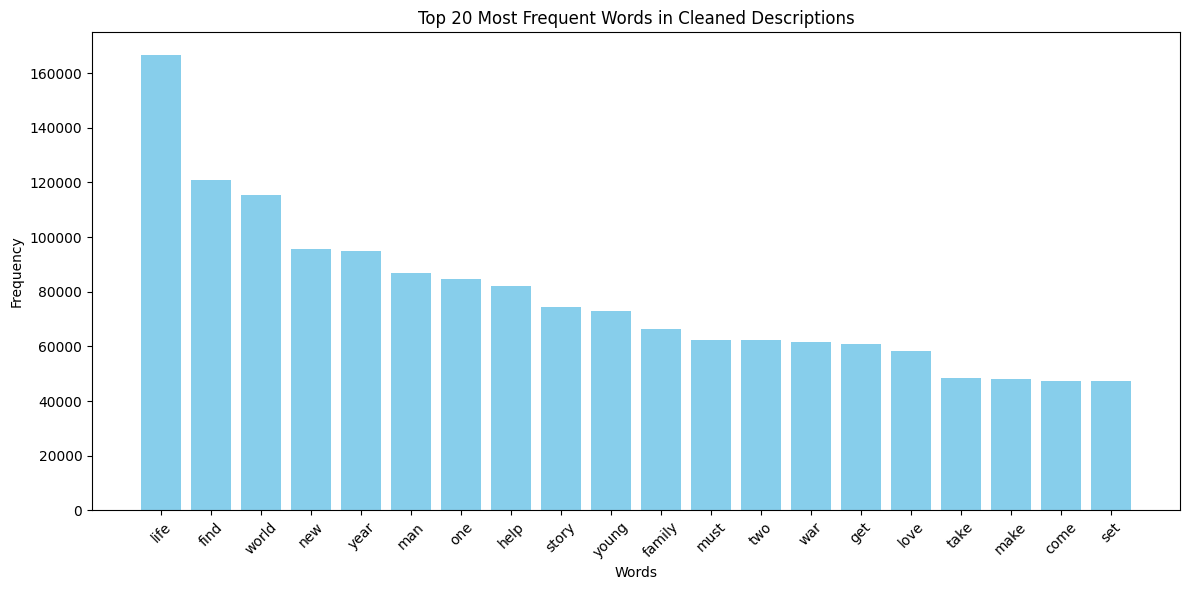

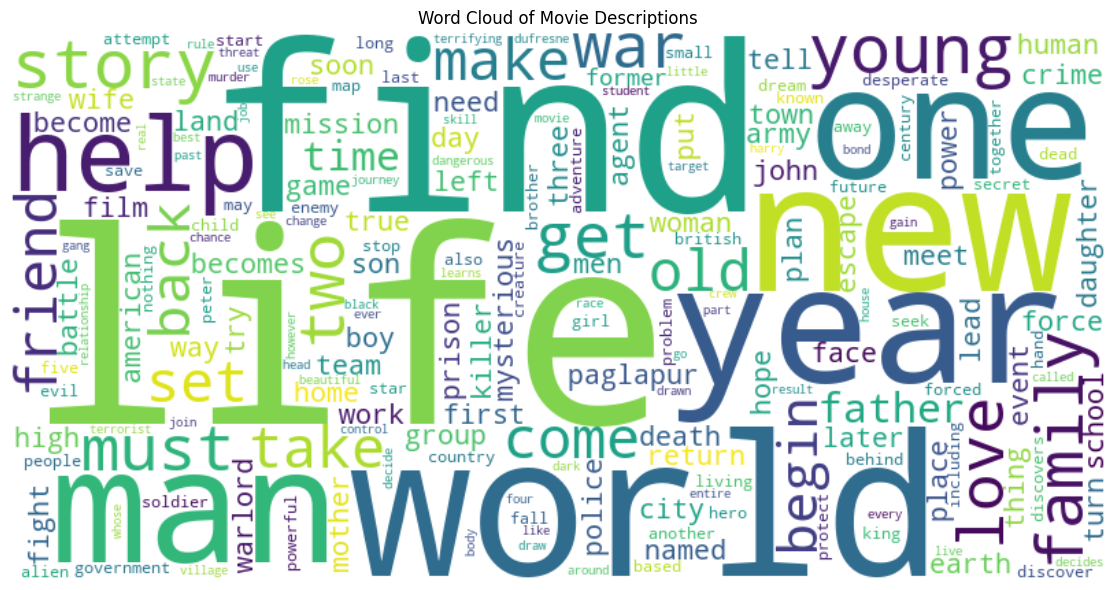

In [34]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all cleaned descriptions
all_words = ' '.join(merged_df['cleaned_description'])

# Tokenize all words
all_tokens = all_words.split()

# Count word frequencies
word_freq = Counter(all_tokens)
top_words = word_freq.most_common(20)

# --- Bar Plot ---
words, counts = zip(*top_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Cleaned Descriptions")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# --- Word Cloud ---
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Descriptions")
plt.tight_layout()
plt.show()


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2)

# Fit and transform
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_df['cleaned_description'])

# Optional: Check the shape
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")


TF-IDF matrix shape: (614698, 8075)


In [45]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Step 1: Remove duplicate movie names
unique_movies_df = merged_df.drop_duplicates(subset='movie_name_clean')

# Step 2: Sample safely
sample_size = min(5000, len(unique_movies_df))
sample_df = unique_movies_df.sample(n=sample_size, random_state=42)
print(len(unique_movies_df))
# Step 3: TF-IDF transform
sample_tfidf = tfidf_vectorizer.transform(sample_df['cleaned_description'])

# Step 4: Compute cosine similarity matrix
cosine_sim_sample = cosine_similarity(sample_tfidf, sample_tfidf)


# Step 2: Function to get top N recommendations for a movie
def get_recommendations_sampled(movie_name, top_n=5):
    # Search in the sampled dataframe
    idx = sample_df[sample_df['movie_name_clean'].str.lower() == movie_name.lower()].index
    if len(idx) == 0:
        return "Movie not found in sample!"
    
    idx = sample_df.index.get_loc(idx[0])  # Get positional index for cosine matrix
    sim_scores = list(enumerate(cosine_sim_sample[idx]))
    
    # Sort by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the movie itself and get top N
    top_indices = [i for i, _ in sim_scores[1:top_n+1]]
    
    return sample_df.iloc[top_indices][['movie_name_clean', 'description']]


# Example usage:
print(get_recommendations_sampled("inception", top_n=5))

931
               movie_name_clean  \
294695          minority report   
187499  guardians of the galaxy   
329787          pitch perfect 2   
262257      law abiding citizen   
602074        where eagles dare   

                                              description  
294695  john anderton is a top 'precrime' cop in the l...  
187499  light years from earth, 26 years after being a...  
329787  the bellas are back, and they are better than ...  
262257  a frustrated man decides to take justice into ...  
602074  world war ii is raging, and an american genera...  


In [46]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import re
from nltk.tokenize import TreebankWordTokenizer

# ✅ 4. Sample data to prevent memory issues
sample_df = sampled_df.copy().reset_index(drop=True)

print(sample_df.shape)
# ✅ 5. TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
sample_tfidf = tfidf_vectorizer.fit_transform(sample_df['cleaned_description'])

# ✅ 6. Compute cosine similarity using linear_kernel (faster)
cosine_sim_sample = linear_kernel(sample_tfidf, sample_tfidf)

# ✅ 7. Recommendation function
def get_recommendations(movie_name, top_n=5):
    # Find index of the movie in sample_df
    idx_list = sample_df[sample_df['movie_name_clean'].str.lower() == movie_name.lower()].index.tolist()
    if not idx_list:
        return "Movie not found in sample!"
    
    idx = idx_list[0]
    # Compute similarity scores
    sim_scores = list(enumerate(cosine_sim_sample[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Avoid duplicates by excluding same movie names
    seen = set([movie_name.lower()])
    recommendations = []
    
    for i, score in sim_scores[1:]:
        candidate = sample_df.iloc[i]
        name = candidate['movie_name_clean'].lower()
        if name not in seen:
            recommendations.append(candidate)
            seen.add(name)
        if len(recommendations) >= top_n:
            break

    return pd.DataFrame(recommendations)[['movie_name_clean', 'description']]


# ✅ 8. Example usage
print(get_recommendations("inception", top_n=5))


(1000, 15)
            movie_name_clean  \
239          minority report   
19           pitch perfect 2   
397  guardians of the galaxy   
188      law abiding citizen   
151        where eagles dare   

                                           description  
239  john anderton is a top 'precrime' cop in the l...  
19   the bellas are back, and they are better than ...  
397  light years from earth, 26 years after being a...  
188  a frustrated man decides to take justice into ...  
151  world war ii is raging, and an american genera...  


In [47]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Sample the data (adjust as needed)
sample_df = sampled_df.copy()
#sample_df = merged_df.sample(n=5000, random_state=42)

# Step 2: Drop duplicates by movie title
sample_df = sample_df.drop_duplicates(subset='movie_name_clean')

# Step 3: Drop entries with no proper description
sample_df = sample_df[~sample_df['description'].str.lower().str.contains("no description available", na=False)]

# Step 4: Fill missing values
sample_df['description'] = sample_df['description'].fillna('')
sample_df['genres'] = sample_df['genres'].fillna('')
sample_df['user_rating'] = sample_df['user_rating'].fillna(0)

# Step 5: Combine features
def combine_features(row):
    return f"{row['description']} {row['genres']} rating: {row['user_rating']}"

sample_df['combined_features'] = sample_df.apply(combine_features, axis=1)

# Step 6: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(sample_df['combined_features'])

# Step 7: Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Reset index to align with cosine similarity
sample_df = sample_df.reset_index(drop=True)

# Step 8: Recommendation function
def get_recommendations(title, top_n=5):
    idx_list = sample_df[sample_df['movie_name_clean'].str.lower() == title.lower()].index
    if len(idx_list) == 0:
        return "Movie not found in sample."
    
    idx = idx_list[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i for i, score in sim_scores[1:top_n+1]]
    
    return sample_df.iloc[top_indices][['movie_name_clean', 'description', 'genres', 'user_rating']]

# Step 9: Try it!
recommendations = get_recommendations("inception", top_n=5)
print(recommendations)


             movie_name_clean  \
366         the fifth element   
19            pitch perfect 2   
130         where eagles dare   
421             black panther   
347  the amazing spider-man 2   

                                           description  \
366  in 2257, a taxi driver is unintentionally give...   
19   the bellas are back, and they are better than ...   
130  world war ii is raging, and an american genera...   
421  t'challa, the superpowered new leader of the h...   
347  for peter parker, life is busy. between taking...   

                         genres  user_rating  
366  action; adventure; sci-fi;          8.0  
19               comedy; music;          7.0  
130     action; adventure; war;          9.0  
421  action; adventure; sci-fi;          6.0  
347  action; adventure; sci-fi;          5.0  


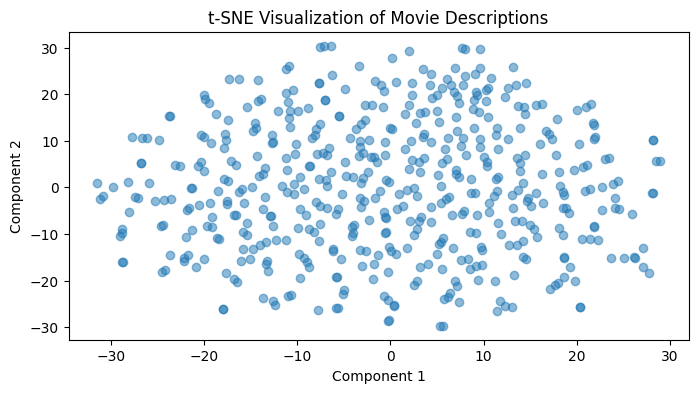

In [48]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce dimensionality of TF-IDF vectors
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(tfidf_matrix.toarray())

# Plot sample points
plt.figure(figsize=(8, 4))
plt.scatter(tsne_result[:500, 0], tsne_result[:500, 1], alpha=0.5)
plt.title("t-SNE Visualization of Movie Descriptions")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


In [49]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
# import numpy as np

# # 1. TF-IDF encoding for cleaned descriptions
# tfidf = TfidfVectorizer(stop_words='english', max_features=300)
# description_features = tfidf.fit_transform(merged_df['cleaned_description'].fillna('')).toarray()

# # 2. One-hot encoding for cleaned genres
# mlb = MultiLabelBinarizer()
# genres_features = mlb.fit_transform(merged_df['genres_clean'])

# # 3. Normalize numerical features (imdb_rating and run_length)
# scaler = MinMaxScaler()
# # run_length is already in minutes in your data
# numerical_features = scaler.fit_transform(merged_df[['imdb_rating', 'run_length']].fillna(0))

# # 4. Combine all feature sets horizontally
# features_combined = np.hstack([description_features, genres_features, numerical_features])

# print(f"features_combined shape: {features_combined.shape}")

features_combined shape: (614698, 320)


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
import numpy as np

# 1. TF-IDF encoding for cleaned descriptions
tfidf = TfidfVectorizer(stop_words='english', max_features=300)
description_features = tfidf.fit_transform(sampled_df['cleaned_description'].fillna('')).toarray()

# 2. One-hot encoding for cleaned genres
sampled_df['genres_clean'] = merged_df.loc[sampled_df.index, 'genres_clean']

mlb = MultiLabelBinarizer()
genres_features = mlb.fit_transform(sampled_df['genres_clean'])

# 3. Normalize numerical features (imdb_rating and run_length)
scaler = MinMaxScaler()
# run_length is already in minutes in your data
numerical_features = scaler.fit_transform(sampled_df[['imdb_rating', 'run_length']].fillna(0))

# 4. Combine all feature sets horizontally
features_combined = np.hstack([description_features, genres_features, numerical_features])

print(f"features_combined shape: {features_combined.shape}")

features_combined shape: (1000, 320)


In [53]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity

# Step 0: Ensure clean data
sample_df = sampled_df.copy()
sample_df = sample_df.dropna(subset=['movie_name_clean', 'user_rating', 'username'])

# Rebuild movie name to index mapping
movie_to_index = {title: i for i, title in enumerate(sample_df['movie_name_clean'])}
index_to_movie = {i: title for title, i in movie_to_index.items()}

# Step 1: Cosine similarity from aligned features
sample_features = features_combined[:len(sample_df)]
cosine_sim = cosine_similarity(sample_features)

# Step 2: Prediction function
def predict_rating(sim_idxs, sim_ratings, target_idx):
    sim_scores = cosine_sim[target_idx, sim_idxs]
    if np.sum(sim_scores) == 0:
        return np.mean(sim_ratings)
    return np.dot(sim_scores, sim_ratings) / np.sum(sim_scores)

# Step 3: Evaluation
actual_ratings = []
predicted_ratings = []

sample_users = sample_df['username'].dropna().unique()[:100]

for user in sample_users:
    user_df = sample_df[sample_df['username'] == user]

    if len(user_df) < 2:
        continue

    rated_titles = user_df['movie_name_clean'].values
    ratings = user_df['user_rating'].values

    for i in range(len(rated_titles)):
        try:
            target_title = rated_titles[i]
            target_rating = ratings[i]

            if target_title not in movie_to_index:
                continue

            temp_titles = np.delete(rated_titles, i)
            temp_ratings = np.delete(ratings, i)

            sim_idxs_ratings = [
                (movie_to_index[t], float(temp_ratings[j]))
                for j, t in enumerate(temp_titles)
                if t in movie_to_index
            ]
            if len(sim_idxs_ratings) < 2:
                continue

            sim_idxs, sim_ratings = zip(*sim_idxs_ratings)
            sim_idxs = list(sim_idxs)
            sim_ratings = list(sim_ratings)

            target_idx = movie_to_index[target_title]
            prediction = predict_rating(sim_idxs, sim_ratings, target_idx)

            actual_ratings.append(target_rating)
            predicted_ratings.append(prediction)
        except Exception as e:
            print(f"Skipping user {user} for movie {rated_titles[i]}: {e}")
            continue

# Step 4: Metrics
if actual_ratings and predicted_ratings:
    rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
    mae = mean_absolute_error(actual_ratings, predicted_ratings)
    print(f"✅ RMSE: {rmse:.4f}")
    print(f"✅ MAE: {mae:.4f}")
else:
    print("⚠️ No valid predictions — check data alignment or number of ratings.")


✅ RMSE: 2.0462
✅ MAE: 1.7891


In [54]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

inputs = tokenizer("Hello BERT!", return_tensors="pt")
outputs = model(**inputs)

print("BERT output shape:", outputs.last_hidden_state.shape)


BERT output shape: torch.Size([1, 5, 768])


In [55]:
def get_bert_embeddings(texts, batch_size=16, max_length=128):
    embeddings = []
    
    # Process the texts in batches to reduce memory usage
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        
        # Tokenize the batch of texts
        inputs = tokenizer(batch, return_tensors='pt', padding=True, truncation=True, max_length=max_length)
        
        # Get the embeddings (use [CLS] token's output)
        with torch.no_grad():
            outputs = model(**inputs)
            batch_embeddings = outputs.last_hidden_state[:, 0, :].numpy()  # Use the embeddings of [CLS] token
            
        embeddings.append(batch_embeddings)
    
    # Return the full list of embeddings
    return np.vstack(embeddings)

In [56]:
# Use a sample to avoid memory issues
#sample_size = 1000  # Adjust this size based on available memory
#sample_df = merged_df.sample(n=sample_size, random_state=42)  # Randomly sample 100 rows

#sample_df = sample_df.drop_duplicates(subset='movie_name_clean').reset_index(drop=True)
# Ensure only unique movie names are considered, then sample 500
sample_df = sampled_df.copy()
unique_movies_df = sample_df.drop_duplicates(subset='movie_name_clean')
sample_df = unique_movies_df.sample(n=500, random_state=42).reset_index(drop=True)
print(sample_df.shape)


# Extract descriptions from the sample
movie_descriptions = sample_df['description'].dropna().tolist()  # Remove any rows with missing descriptions


(500, 16)


In [57]:
# Generate BERT embeddings for the sampled movie descriptions
embeddings = get_bert_embeddings(movie_descriptions, batch_size=16, max_length=128)


In [58]:
# Compute similarity (for recommendation)
similarity_matrix = cosine_similarity(embeddings)


In [59]:
# Output the similarity matrix (showing similarity between movies)
print("Cosine Similarity Matrix:\n", similarity_matrix)


Cosine Similarity Matrix:
 [[1.         0.9261495  0.93651015 ... 0.90700793 0.9233439  0.92884463]
 [0.9261495  0.9999999  0.9339117  ... 0.89507496 0.9129148  0.9280162 ]
 [0.93651015 0.9339117  1.         ... 0.9038793  0.93341625 0.92521   ]
 ...
 [0.90700793 0.89507496 0.9038793  ... 0.9999999  0.90500355 0.87941074]
 [0.9233439  0.9129148  0.93341625 ... 0.90500355 1.         0.8904336 ]
 [0.92884463 0.9280162  0.92521    ... 0.87941074 0.8904336  0.99999976]]


In [60]:
# Example of recommending similar movies based on the first movie (index 0)
movie_index = 0
similar_movies = similarity_matrix[movie_index]

# Sorting movies based on similarity to the first movie
sorted_indices = np.argsort(similar_movies)[::-1]  # Sorting in descending order of similarity
#recommended_movies = [sample_df['name_clean'].iloc[i] for i in sorted_indices]
top_indices = [i for i in sorted_indices if i != movie_index][:5]


In [61]:
print(f"\nTop 5 movies similar to '{sample_df.iloc[movie_index]['movie_name_clean']}':\n")
for i in top_indices:
    print(f"- {sample_df.iloc[i]['movie_name_clean']}")


Top 5 movies similar to 'zootopia':

- easy a
- nightcrawler
- the silence of the lambs
- the expendables 2
- the bodyguard


In [85]:
# Check similarity values for the first movie
print("Similarities for the first movie:")
print(similarity_matrix[0])  # This will give you the similarity values with the first movie

# Check if the values are very similar
print("\nMax similarity value:", np.max(similarity_matrix[0]))
print("Min similarity value:", np.min(similarity_matrix[0]))


Similarities for the first movie:
[1.         0.9261495  0.93651015 0.86817324 0.9217849  0.9295381
 0.90763676 0.908196   0.94359434 0.8992926  0.9034393  0.9075798
 0.8894503  0.9383378  0.89843965 0.92365265 0.88931525 0.9174905
 0.9306153  0.95404994 0.93037236 0.9305632  0.9314276  0.87700415
 0.9266125  0.93102205 0.89198434 0.9154502  0.913134   0.8813491
 0.93755376 0.92675316 0.9249337  0.9023005  0.86001825 0.92605954
 0.9273931  0.93604314 0.89903903 0.8580543  0.9236838  0.92843413
 0.87395763 0.9175098  0.9216566  0.93109226 0.9258715  0.92786413
 0.87870187 0.9141492  0.85240716 0.92464185 0.90856135 0.9039357
 0.87260574 0.9034408  0.9327488  0.90310234 0.9030056  0.89116335
 0.8575262  0.91894114 0.9026365  0.90417206 0.92941153 0.9154757
 0.9315505  0.94028646 0.93552196 0.93249214 0.92658144 0.90113795
 0.88885486 0.9235262  0.93274987 0.88995093 0.94706774 0.89952683
 0.8642437  0.9175434  0.874189   0.9211272  0.9368079  0.92005646
 0.89507055 0.92802286 0.9382517  

In [62]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

# Load your merged dataset (make sure it's already in your environment)
# merged_df = pd.read_csv("path_to_your_merged_data.csv")  # if not already loaded

# Filter all user ratings for the target movie "inception"
actual_df = merged_df[merged_df['movie_name_clean'].str.lower() == 'zootopia']

# Get the actual ratings (ground truth)
actual_ratings = actual_df['user_rating'].values

# Print how many actual ratings we have
print(f"Number of actual user ratings for 'zootopia': {len(actual_ratings)}")

# Predicted ratings from the top 5 BERT-based recommended movies
# Use actual 'rating_x' (user ratings) from merged_df for these movies
recommended_movies = [
    "easy a",
    "nightcrawler",
    "the silence of the lambs",
    "the expendables 2",
    "the bodyguard"
]

# Get average user rating_x for each of the recommended movies
predicted_ratings = []
for movie in recommended_movies:
    user_ratings = merged_df[merged_df['movie_name_clean'].str.lower() == movie]['user_rating'].values
    user_ratings = pd.to_numeric(user_ratings, errors='coerce')  # ensure numeric
    user_ratings = user_ratings[~np.isnan(user_ratings)]         # drop NaNs

    if len(user_ratings) > 0:
        predicted_ratings.append(np.mean(user_ratings))
    else:
        predicted_ratings.append(0)

predicted_ratings = np.array(predicted_ratings)
actual_ratings = actual_ratings[:len(predicted_ratings)]  # match lengths

# Binary conversion using threshold (liked = rating >= 6.5)
threshold = 6.5
actual_ratings = np.array(actual_ratings, dtype=np.float64)
actual_binary = actual_ratings >= threshold

#actual_binary = actual_ratings >= threshold
predicted_binary = predicted_ratings >= threshold

# Evaluation Metrics
precision = precision_score(actual_binary, predicted_binary)
recall = recall_score(actual_binary, predicted_binary)
f1 = f1_score(actual_binary, predicted_binary)
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

# Results
print(f"\n📊 Evaluation for DistilBERT-based Recommendations (Target: zootopia)")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"RMSE: {rmse:.4f}")


Number of actual user ratings for 'zootopia': 671

📊 Evaluation for BERT-based Recommendations (Target: zootopia)
Precision: 1.0000
Recall: 0.8000
F1-Score: 0.8889
RMSE: 2.0073


In [191]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

# Load and preprocess a small subset of your dataset, Drop duplicates and sample from the dataset
#sample_data = merged_df.drop_duplicates(subset=['movie_name_clean']).sample(n=500, random_state=42).reset_index(drop=True)

sample_df = sampled_df.copy()
unique_movies_df = sample_df.drop_duplicates(subset='movie_name_clean')
sample_df = unique_movies_df.sample(n=500, random_state=42).reset_index(drop=True)
print(sample_df.columns)

# Replace 'Null' with actual NaN values
sample_df.loc[:, 'user_rating'] = sample_df['user_rating'].replace('Null', np.nan)

# Convert to numeric, coercing errors to NaN
sample_df.loc[:, 'user_rating'] = pd.to_numeric(sample_df['user_rating'], errors='coerce')

# Fill NaNs with 0 initially (to clean data before calculating averages)
sample_df.loc[:, 'user_rating'] = sample_df['user_rating'].fillna(0)

# Calculate global average excluding 0 ratings
global_avg = sample_df.loc[sample_df['user_rating'] != 0, 'user_rating'].mean()

# Replace 0.0 in rating_x with the average rating for that movie (excluding 0s), else use global_avg
sample_df.loc[:, 'user_rating'] = sample_df.groupby('movie_name_clean')['user_rating'].transform(
    lambda x: x.replace(0, x[x != 0].mean() if not x[x != 0].empty else global_avg)
)

# Handle missing descriptions
sample_df.loc[:, 'description'] = sample_df['description'].fillna('No description available')

# Step 1: Item-based Collaborative Filtering using cosine similarity
# Let's consider 'name_clean' as the movie name, and 'rating_x' as user ratings
movie_ratings_matrix = sample_df.pivot_table(index='username', columns='movie_name_clean', values='user_rating')

# Fill missing values with user mean for collaborative filtering
movie_ratings_matrix = movie_ratings_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)

# In case some users have all NaNs (mean is still NaN), fill remaining NaNs with global mean
global_mean = movie_ratings_matrix.stack().mean()
movie_ratings_matrix = movie_ratings_matrix.fillna(global_mean)
movie_ratings_matrix = movie_ratings_matrix.apply(lambda row: row.replace(0, row.mean()), axis=1)


# Calculate cosine similarity between movies
cosine_sim = cosine_similarity(movie_ratings_matrix.T)

# Step 2: Content-Based Filtering using BERT embeddings for movie descriptions
# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for a movie description
def get_bert_embedding(description):
    inputs = tokenizer(description, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

# Get embeddings for each movie description
movie_descriptions = sample_df['description'].tolist()  # Ensure it's a plain list

# Collect embeddings as 2D vectors
embeddings = []

for desc in movie_descriptions:
    inputs = tokenizer(desc, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    mean_embedding = outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()
    embeddings.append(mean_embedding)

# Convert to 2D numpy array
embeddings = np.array(embeddings)  # Now shape will be (n_movies, embedding_dim)

# Now this will work
content_cosine_sim = cosine_similarity(embeddings)

# Step 3: Combine the CF and Content-based recommendations using a weighted sum
alpha = 0.3 

# Combine the similarity matrices (CF + Content)
hybrid_cosine_sim = alpha * cosine_sim + (1 - alpha) * content_cosine_sim

# Step 4: Generate hybrid recommendation scores for all movies
hybrid_recs_list = []

for idx in range(len(sample_df)):
    movie_name = sample_df.iloc[idx]['movie_name_clean']
    
    sim_scores = list(enumerate(hybrid_cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the movie itself
    sim_scores = [score for score in sim_scores if score[0] != idx]
    
    # Take top-1 similar movie's similarity score
    top_sim = sim_scores[0]
    top_sim_score = top_sim[1]

    hybrid_recs_list.append({
        'movie_name_clean': movie_name,
        'hybrid_score': top_sim_score
    })

# Store as DataFrame
hybrid_recs = pd.DataFrame(hybrid_recs_list)

# Step 4: Recommendation function with filtering of duplicate or target movie
def recommend_movies_with_scores(movie_name, hybrid_sim_matrix, top_n=5):
    indices = sample_df[sample_df['movie_name_clean'] == movie_name].index
    if len(indices) == 0:
        print(f"❌ Movie '{movie_name}' not found in the sample dataset.")
        return pd.DataFrame(), []
    
    idx = indices[0]
    sim_scores = list(enumerate(hybrid_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the target movie itself
    sim_scores = [score for score in sim_scores if score[0] != idx]
    
    top_scores = sim_scores[:top_n]
    movie_indices = [i[0] for i in top_scores]
    similarities = [i[1] for i in top_scores]
    
    return sample_df.iloc[movie_indices][['movie_name_clean', 'description', 'genres', 'user_rating', 'imdb_rating']], similarities


# target_movie = 'inception'
# recommended_movies, similarities = recommend_movies_with_scores(target_movie, hybrid_cosine_sim, top_n=5)



Index(['username', 'user_rating', 'helpful', 'total', 'review_title', 'review',
       'movie_name_clean', 'year', 'run_length', 'genres', 'imdb_rating',
       'num_raters', 'num_reviews', 'description', 'cleaned_description',
       'genres_clean'],
      dtype='object')


In [192]:
target_movie = 'zootopia'
recommended_movies, similarities = recommend_movies_with_scores(target_movie, hybrid_cosine_sim, top_n=5)

# Actual ratings
actual_ratings = recommended_movies['user_rating'].values

# Predicted ratings based on similarity weighted average
weighted_sum = np.sum(actual_ratings * similarities)
sum_of_similarities = np.sum(similarities)

predicted_rating = weighted_sum / sum_of_similarities


# Improved: Predict rating for each recommended movie based on its own top-k similar movies
def predict_rating_for_movie(movie_idx, hybrid_sim_matrix, ratings_df, top_k=11):
    # Get similarity scores for the movie
    sim_scores = list(enumerate(hybrid_sim_matrix[movie_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the movie itself
    sim_scores = [score for score in sim_scores if score[0] != movie_idx]
    
    # Pick top-k similar movies
    top_similar = sim_scores[:top_k]
    
    weighted_sum = 0
    sim_sum = 0
    for idx, sim in top_similar:
        rating = ratings_df.iloc[idx]['user_rating']
        if not np.isnan(rating):
            weighted_sum += rating * sim
            sim_sum += sim
    
    return weighted_sum / sim_sum if sim_sum != 0 else global_avg

# Predict ratings individually for recommended movies
predicted_ratings = []
for i in recommended_movies.index:
    predicted = predict_rating_for_movie(i, hybrid_cosine_sim, sample_df)
    predicted_ratings.append(predicted)

predicted_ratings = np.array(predicted_ratings)



In [193]:
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

threshold = 6.5
actual_binary = (actual_ratings >= threshold).astype(int)
predicted_binary = (predicted_ratings >= threshold).astype(int)

precision = precision_score(actual_binary, predicted_binary)
recall = recall_score(actual_binary, predicted_binary)
f1 = f1_score(actual_binary, predicted_binary)
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

print(f"📊 Evaluation for Hybrid System (Target: '{target_movie}'):")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"RMSE: {rmse:.4f}")


📊 Evaluation for Hybrid System (Target: 'zootopia'):
Precision: 0.6000
Recall: 1.0000
F1-Score: 0.7500
RMSE: 1.8541


In [115]:
#analyze sentiments of description

In [200]:
!pip install vaderSentiment


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the cleaned descriptions
def get_sentiment(description):
    sentiment_score = analyzer.polarity_scores(description)['compound']  # 'compound' score ranges from -1 to 1
    if sentiment_score > 0.05:
        return 'positive'
    elif sentiment_score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment function to 'cleaned_description' column
merged_df['sentiment'] = merged_df['cleaned_description'].apply(get_sentiment)

# Check the distribution of sentiments
sentiment_distribution = merged_df['sentiment'].value_counts()
print(sentiment_distribution)


sentiment
negative    327008
positive    257482
neutral      30208
Name: count, dtype: int64


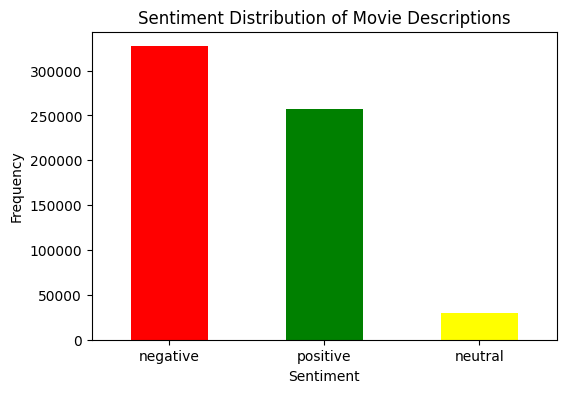

In [73]:
import matplotlib.pyplot as plt

# Plot the distribution of sentiments
plt.figure(figsize=(6, 4))
sentiment_distribution.plot(kind='bar', color=['red', 'green', 'yellow'])
plt.title('Sentiment Distribution of Movie Descriptions')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


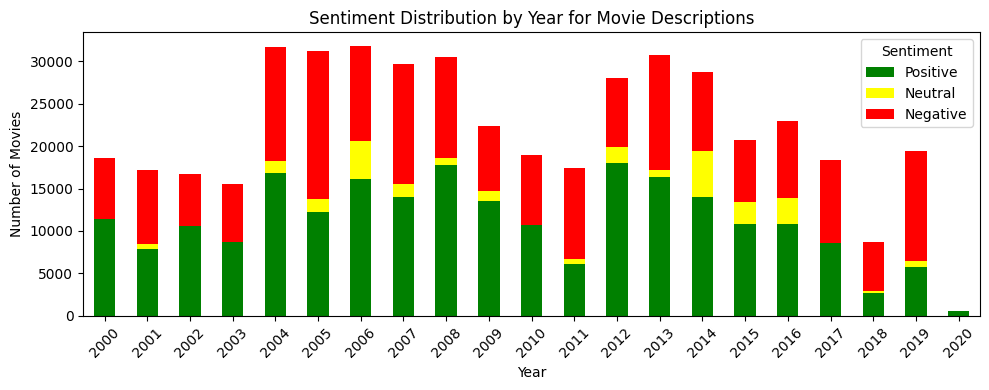

In [74]:
# Filter the merged_df to include only rows where 'year' is between 1970 and the maximum year in the dataset
merged_df_filtered = merged_df[(merged_df['year'] >= 2000) & (merged_df['year'] <= merged_df['year'].max())]

# Group the data by 'year' and 'sentiment' to count occurrences
sentiment_by_year = merged_df_filtered.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

# Plotting a stacked bar chart
sentiment_by_year.plot(kind='bar', stacked=True, color=['green', 'yellow', 'red'], figsize=(10, 4))

# Customize the plot
plt.title('Sentiment Distribution by Year for Movie Descriptions')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', labels=['Positive', 'Neutral', 'Negative'])
plt.tight_layout()

# Show the plot
plt.show()


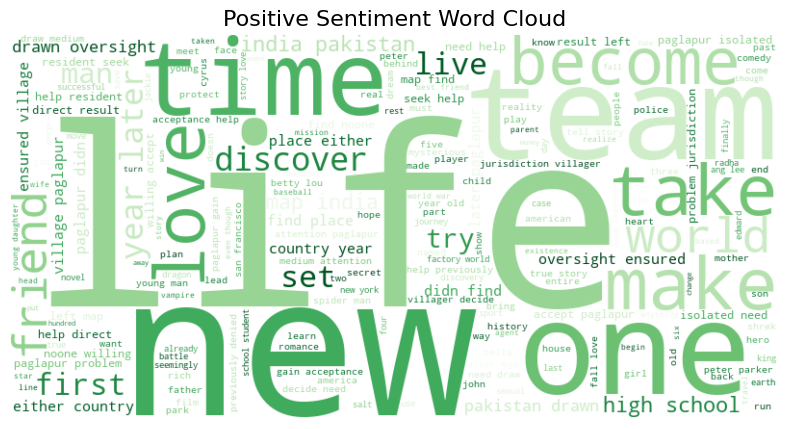

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sample_data = sampled_df.copy()
# Combine all positive descriptions
sample_data['sentiment'] = sample_data['cleaned_description'].apply(get_sentiment)

positive_text = ' '.join(sample_data[sample_data['sentiment'] == 'positive']['cleaned_description'].dropna())

# Generate word cloud
positive_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud', fontsize=16)
plt.show()


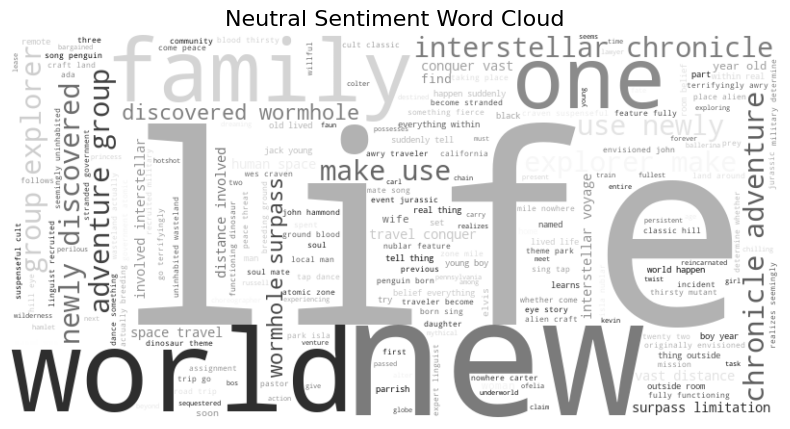

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all neutral descriptions
sample_data['sentiment'] = sample_data['cleaned_description'].apply(get_sentiment)
neutral_text = ' '.join(sample_data[sample_data['sentiment'] == 'neutral']['cleaned_description'].dropna())

# Generate word cloud
neutral_wc = WordCloud(width=800, height=400, background_color='white', colormap='gray').generate(neutral_text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(neutral_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Sentiment Word Cloud', fontsize=16)
plt.show()


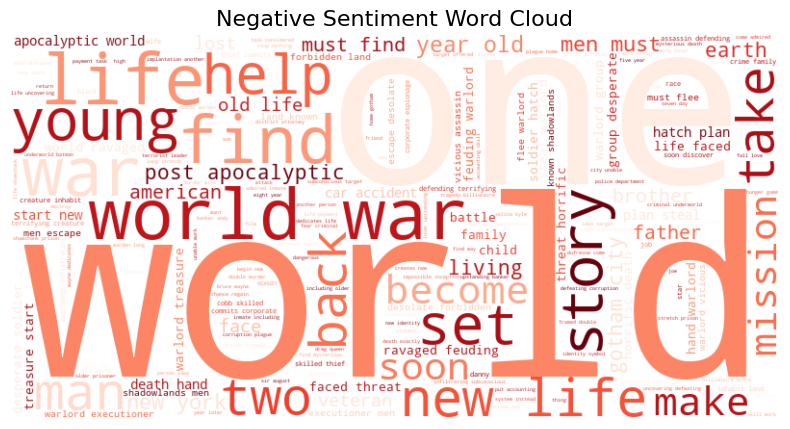

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all negative descriptions
sample_data['sentiment'] = sample_data['cleaned_description'].apply(get_sentiment)
negative_text = ' '.join(sample_data[sample_data['sentiment'] == 'negative']['cleaned_description'].dropna())

# Generate word cloud
negative_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud', fontsize=16)
plt.show()


In [92]:
sample_df.head()

,username,user_rating,helpful,total,review_title,review,movie_name_clean,year,run_length,genres,imdb_rating,num_raters,num_reviews,description,cleaned_description,genres_clean
0,jonahcapani,10.0,7,13,fantastic movie for people of (almost) all ages.,words can't describe how amazing this movie wa...,zootopia,2016,108,animation; adventure; comedy;,8.0,417226,710,"determined to prove herself, officer judy hopp...",determined prove herself officer judy hopps fi...,"[animation, adventure, comedy]"
1,jona1988,8.0,2,3,manages to deliver in ways that will entertain...,what i find so impressive with how to train yo...,how to train your dragon,2010,98,animation; action; adventure;,8.1,647266,626,as the son of a viking leader on the cusp of m...,son viking leader cusp manhood shy hiccup horr...,"[animation, action, adventure]"
2,bkoganbing,5.0,1,2,you don't cheat the grim reaper,final destination which spawned a veritable co...,final destination,2000,98,horror; thriller;,6.7,223423,727,after a teenager has a terrifying vision of hi...,after teenager terrifying vision him friends d...,"[horror, thriller]"
3,jujuc,10.0,1,2,a movie for everyone,"now, im not gonna spoil anything, although im ...",forrest gump,1994,142,drama; romance;,8.8,1741097,2354,a man with a low iq has accomplished great thi...,man low iq accomplished great things life been...,"[drama, romance]"
4,ellis-63434,9.0,1,3,brilliant!,"i'm a huge denzel washington fan, mainly of hi...",flight,2012,138,drama; thriller;,7.3,317752,573,commercial airline pilot whip whitaker has a p...,commercial airline pilot whip whitaker problem...,"[drama, thriller]"


In [313]:
#sentiment analysis of reviews
#VADER

In [82]:
import pandas as pd

# Sample a subset of 500 movies from the merged_df (adjust the number as needed)
sample_data = sampled_df.copy()
#sample_data = sample_df.sample(n=500, random_state=42).reset_index(drop=True)

# Ensure that 'review' and 'genres' columns are present and clean
sample_data = sample_data.dropna(subset=['review', 'genres'])

# Extract the 'review' column for sentiment analysis
reviews = sample_data[['movie_name_clean', 'review', 'genres', 'user_rating']]

# Preview the data
reviews.head()


,movie_name_clean,review,genres,user_rating
153067,fifty shades of grey,for some of you wonderful film lovers who perh...,romance;,4.0
235855,it's a wonderful life,this should be the movie making approach..enli...,drama; fantasy;,9.0
214825,inception,one is a rate to balance properly the fanatic ...,action; adventure; sci-fi;,1.0
449100,the dark knight rises,"nolan is one lucky filmmaker, always enjoying ...",action; adventure;,4.0
182646,gran torino,a nicely and at times beautifully photographed...,drama;,1.0


In [143]:
merged_df.shape

(446056, 17)

In [83]:
import re
import string

# Function for basic text cleaning
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'<[^>]*>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces
    return text

# Apply cleaning to all reviews
sample_data['cleaned_review'] = sample_data['review'].apply(clean_text)

# Preview the cleaned reviews
sample_data[['movie_name_clean', 'cleaned_review', 'user_rating']].head()


,movie_name_clean,cleaned_review,user_rating
153067,fifty shades of grey,for some of you wonderful film lovers who perh...,4.0
235855,it's a wonderful life,this should be the movie making approachenligh...,9.0
214825,inception,one is a rate to balance properly the fanatic ...,1.0
449100,the dark knight rises,nolan is one lucky filmmaker always enjoying b...,4.0
182646,gran torino,a nicely and at times beautifully photographed...,1.0


In [84]:
import string

# Define a list of stopwords (can expand this list as needed)
stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", 
    "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", 
    "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", 
    "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", 
    "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", 
    "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", 
    "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should",
    "now", "d", "ll", "m", "o", "re", "ve", "y", "ain", "aren", "couldn", "didn", "doesn", "hadn", "hasn", "haven", "isn", "ma", 
    "mightn", "mustn", "needn", "shan", "shouldn", "wasn", "weren", "won", "wouldn"
])

# Function for manual tokenization and removing stopwords
def manual_tokenize_and_remove_stopwords(text):
    # Convert text to lowercase and split it into words
    words = text.lower().split()
    
    # Remove punctuation and non-alphabetic characters
    words = [word.strip(string.punctuation) for word in words if word.strip(string.punctuation).isalpha()]
    
    # Remove stopwords
    words = [word for word in words if word not in stopwords]
    
    return " ".join(words)

# Apply manual tokenization and stopwords removal to cleaned reviews
sample_data['cleaned_review'] = sample_data['cleaned_review'].apply(manual_tokenize_and_remove_stopwords)

# Preview the cleaned reviews after tokenization and stopwords removal
sample_data[['movie_name_clean', 'cleaned_review', 'user_rating']].head()


,movie_name_clean,cleaned_review,user_rating
153067,fifty shades of grey,wonderful film lovers perhaps know little bit ...,4.0
235855,it's a wonderful life,movie making approachenlightening educating si...,9.0
214825,inception,one rate balance properly fanatic reviews good...,1.0
449100,the dark knight rises,nolan one lucky filmmaker always enjoying big ...,4.0
182646,gran torino,nicely times beautifully photographed movie ac...,1.0


In [85]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(review):
    # Get the sentiment score
    sentiment = sia.polarity_scores(review)
    # Return the compound score (this ranges from -1 (negative) to 1 (positive))
    return sentiment['compound']

# Apply the sentiment analysis to each cleaned review
sample_data['r_sentiment_score'] = sample_data['cleaned_review'].apply(get_sentiment_score)

# Preview the sentiment scores for each review
sample_data[['movie_name_clean', 'cleaned_review', 'r_sentiment_score', 'user_rating']].head()


,movie_name_clean,cleaned_review,r_sentiment_score,user_rating
153067,fifty shades of grey,wonderful film lovers perhaps know little bit ...,0.9942,4.0
235855,it's a wonderful life,movie making approachenlightening educating si...,0.9801,9.0
214825,inception,one rate balance properly fanatic reviews good...,0.9766,1.0
449100,the dark knight rises,nolan one lucky filmmaker always enjoying big ...,0.9037,4.0
182646,gran torino,nicely times beautifully photographed movie ac...,-0.9902,1.0


In [86]:
# Classify sentiment based on VADER scores
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply classification to sentiment scores
sample_data['predicted_sentiment'] = sample_data['r_sentiment_score'].apply(classify_sentiment)

# Preview the resulting classifications
sample_data[['movie_name_clean', 'cleaned_review', 'r_sentiment_score', 'predicted_sentiment', 'user_rating']].head()


,movie_name_clean,cleaned_review,r_sentiment_score,predicted_sentiment,user_rating
153067,fifty shades of grey,wonderful film lovers perhaps know little bit ...,0.9942,Positive,4.0
235855,it's a wonderful life,movie making approachenlightening educating si...,0.9801,Positive,9.0
214825,inception,one rate balance properly fanatic reviews good...,0.9766,Positive,1.0
449100,the dark knight rises,nolan one lucky filmmaker always enjoying big ...,0.9037,Positive,4.0
182646,gran torino,nicely times beautifully photographed movie ac...,-0.9902,Negative,1.0


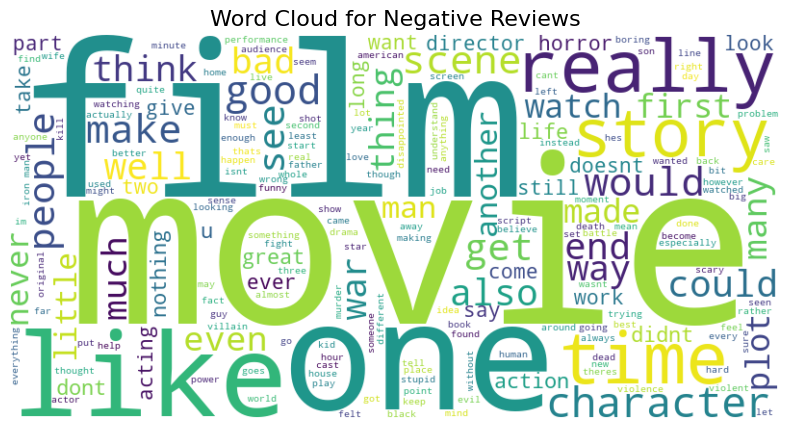

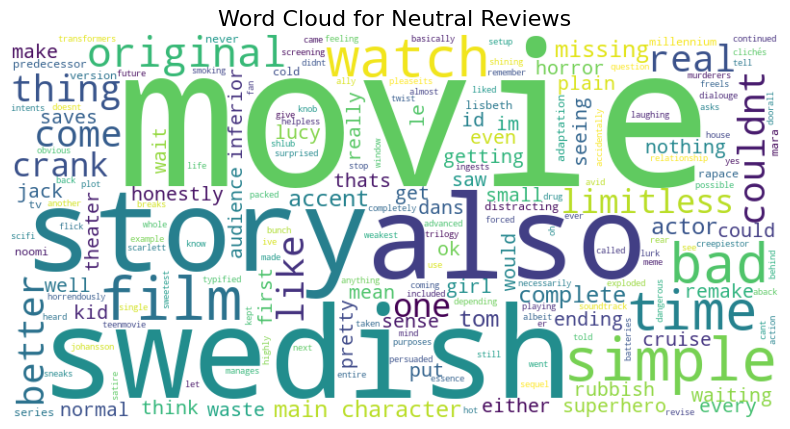

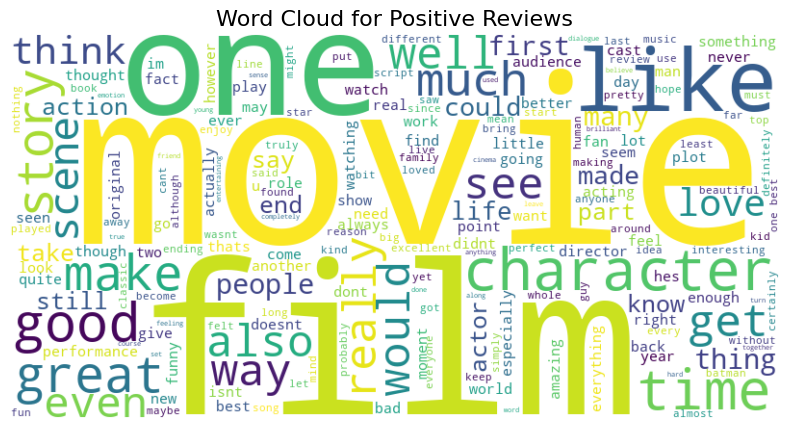

In [91]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Optional: ensure 'cleaned_review' column is string type
sample_data['cleaned_review'] = sample_data['cleaned_review'].astype(str)

# Group reviews by sentiment
sentiment_groups = sample_data.groupby('predicted_sentiment')

# Generate word clouds
for sentiment, group in sentiment_groups:
    text = " ".join(group['cleaned_review'].dropna())
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords='english', colormap='viridis').generate(text)
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Reviews', fontsize=16)
    plt.show()


In [88]:
# Compute average rating per movie
avg_ratings = merged_df.groupby('movie_name_clean')['user_rating'].mean().reset_index()
avg_ratings.columns = ['movie_name_clean', 'avg_rating']  # Explicitly name columns

# Merge with original DataFrame to add avg_rating as a new column
merged_df = merged_df.merge(avg_ratings, on='movie_name_clean', how='left')


In [87]:
merged_df.head()

,username,user_rating,helpful,total,review_title,review,movie_name_clean,year,run_length,genres,imdb_rating,num_raters,num_reviews,description,genres_clean,cleaned_description,sentiment
0,imme-van-gorp,7.0,102,123,unfortunately the ending ruined an otherwise g...,this movie is full of suspense. it makes you g...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find...","[drama, horror, mystery]",car accident michelle awakens find mysterious ...,negative
1,sonofocelot-1,5.0,385,500,...oh dear abrams. again.,i'll leave this review fairly concise. <br/><b...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find...","[drama, horror, mystery]",car accident michelle awakens find mysterious ...,negative
2,mhodaee,5.0,110,143,"fantastic, gripping, thoroughly enjoyable, unt...",i give the 5/10 out of the credit i owe to the...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find...","[drama, horror, mystery]",car accident michelle awakens find mysterious ...,negative
3,fil-nik09,5.0,73,100,hmmm...,"first of all, i must say that i was expecting ...",10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find...","[drama, horror, mystery]",car accident michelle awakens find mysterious ...,negative
4,dvr_brale,7.0,42,56,slow building & plot alternating claustrophobi...,i've always loved movies with strong atmospher...,10 cloverfield lane,2016,103,drama; horror; mystery;,7.2,280919,752,"after a car accident, michelle awakens to find...","[drama, horror, mystery]",car accident michelle awakens find mysterious ...,negative


In [150]:
sample_data.head()

,username,user_rating,helpful,total,review_title,review,movie_name_clean,year,run_length,genres,imdb_rating,num_raters,num_reviews,description,cleaned_description,genres_clean,cleaned_review,r_sentiment_score,predicted_sentiment
0,jonahcapani,10.0,7,13,fantastic movie for people of (almost) all ages.,words can't describe how amazing this movie wa...,zootopia,2016,108,animation; adventure; comedy;,8.0,417226,710,"determined to prove herself, officer judy hopp...",determined prove herself officer judy hopps fi...,"[animation, adventure, comedy]",words cant describe amazing movie watched firs...,0.9803,Positive
1,jona1988,8.0,2,3,manages to deliver in ways that will entertain...,what i find so impressive with how to train yo...,how to train your dragon,2010,98,animation; action; adventure;,8.1,647266,626,as the son of a viking leader on the cusp of m...,son viking leader cusp manhood shy hiccup horr...,"[animation, action, adventure]",find impressive train dragon also stated title...,0.9991,Positive
2,bkoganbing,5.0,1,2,you don't cheat the grim reaper,final destination which spawned a veritable co...,final destination,2000,98,horror; thriller;,6.7,223423,727,after a teenager has a terrifying vision of hi...,after teenager terrifying vision him friends d...,"[horror, thriller]",final destination spawned veritable cottage in...,0.8795,Positive
3,jujuc,10.0,1,2,a movie for everyone,"now, im not gonna spoil anything, although im ...",forrest gump,1994,142,drama; romance;,8.8,1741097,2354,a man with a low iq has accomplished great thi...,man low iq accomplished great things life been...,"[drama, romance]",im gonna spoil anything although im presuming ...,0.9744,Positive
4,ellis-63434,9.0,1,3,brilliant!,"i'm a huge denzel washington fan, mainly of hi...",flight,2012,138,drama; thriller;,7.3,317752,573,commercial airline pilot whip whitaker has a p...,commercial airline pilot whip whitaker problem...,"[drama, thriller]",im huge denzel washington fan mainly action ad...,0.9522,Positive


In [89]:
sample_data = sample_data.merge(
    merged_df[['movie_name_clean', 'avg_rating']].drop_duplicates(),
    on='movie_name_clean',
    how='left'
)


In [90]:
sample_data = sample_data[[
    'movie_name_clean', 'cleaned_review', 'r_sentiment_score', 'predicted_sentiment', 'avg_rating', 'user_rating'
]]


In [92]:
sample_data['actual_sentiment'] = sample_data['avg_rating'].apply(
    lambda x: 'Positive' if x >= 7.0 else 'Negative'
)


(1000, 7)


C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    Negative       0.48      0.25      0.33       396
     Neutral       0.00      0.00      0.00         0
    Positive       0.63      0.81      0.71       604

    accuracy                           0.59      1000
   macro avg       0.37      0.35      0.35      1000
weighted avg       0.57      0.59      0.56      1000



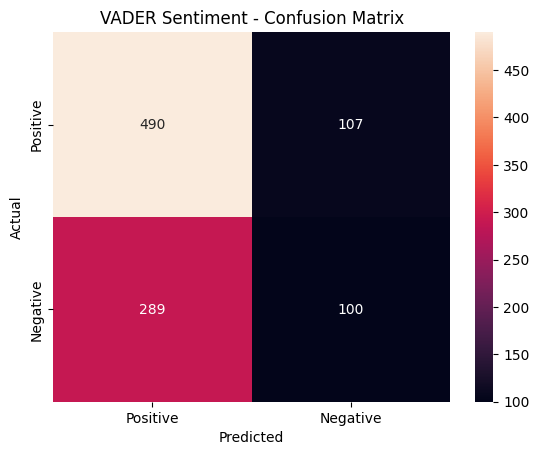

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Remove duplicates based on review text and movie name
sample_data_unique = sample_data.drop_duplicates(subset=['movie_name_clean', 'cleaned_review'])
print(sample_data.shape)
# Classification report
print(classification_report(
    sample_data_unique['actual_sentiment'],
    sample_data_unique['predicted_sentiment']
))

# Assign y_true and y_pred
y_true = sample_data_unique['actual_sentiment']
y_pred = sample_data_unique['predicted_sentiment']

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=['Positive', 'Negative'])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('VADER Sentiment - Confusion Matrix')
plt.show()


In [94]:
# Encode the sentiments: Positive -> 1, Negative -> 0
sample_data_unique['actual_sentiment'] = sample_data_unique['actual_sentiment'].map({'Positive': 1, 'Negative': 0})

# Check the changes in the dataframe
sample_data_unique.head()


,movie_name_clean,cleaned_review,r_sentiment_score,predicted_sentiment,avg_rating,user_rating,actual_sentiment
0,fifty shades of grey,wonderful film lovers perhaps know little bit ...,0.9942,Positive,5.092359,4.0,0
1,it's a wonderful life,movie making approachenlightening educating si...,0.9801,Positive,9.032663,9.0,1
2,inception,one rate balance properly fanatic reviews good...,0.9766,Positive,8.018560,1.0,1
3,the dark knight rises,nolan one lucky filmmaker always enjoying big ...,0.9037,Positive,7.664803,4.0,1
4,gran torino,nicely times beautifully photographed movie ac...,-0.9902,Negative,7.666306,1.0,1


In [95]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the cleaned_review column to get the bag-of-words representation
X = vectorizer.fit_transform(sample_data_unique['cleaned_review'])

# Check the shape of the transformed data
X.shape


(1000, 18433)

In [96]:
from sklearn.model_selection import train_test_split

# Extract the features (X) and target labels (y)
X = vectorizer.transform(sample_data_unique['cleaned_review'])
y = sample_data_unique['actual_sentiment']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 18433), (200, 18433), (800,), (200,))

In [97]:
#logistic regression

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Check the training accuracy
train_accuracy = lr_model.score(X_train, y_train)
train_accuracy

# Predict on the test data
y_pred = lr_model.predict(X_test)

# Evaluate performance on test data
classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)


              precision    recall  f1-score   support

           0       0.61      0.45      0.52        78
           1       0.70      0.82      0.75       122

    accuracy                           0.68       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.67      0.68      0.66       200



In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming 'sample_data_unique' is the dataset you're using
# Use the cleaned reviews as input text
X = sample_data_unique['cleaned_review']
y = sample_data_unique['actual_sentiment']  # Sentiment labels (0 or 1)

# Step 1: Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Limit number of features
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Step 3: Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = lr_model.predict(X_test)

# Step 5: Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.14      0.24        78
           1       0.64      0.98      0.77       122

    accuracy                           0.65       200
   macro avg       0.71      0.56      0.51       200
weighted avg       0.70      0.65      0.56       200



In [100]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the class distribution
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the Logistic Regression model on the resampled data
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.64      0.49      0.55        78
           1       0.72      0.83      0.77       122

    accuracy                           0.69       200
   macro avg       0.68      0.66      0.66       200
weighted avg       0.69      0.69      0.68       200



In [101]:
#random forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_resampled, y_resampled)

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.54      0.41      0.47        78
           1       0.67      0.78      0.72       122

    accuracy                           0.64       200
   macro avg       0.61      0.59      0.59       200
weighted avg       0.62      0.64      0.62       200



In [103]:
#SVM

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Prepare the data
X = sample_data_unique['cleaned_review']  # Text data (cleaned review)
y = sample_data_unique['actual_sentiment']  # Labels (sentiment)

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM Model with TF-IDF Vectorizer
svm_model = make_pipeline(TfidfVectorizer(), SVC(kernel='linear', class_weight='balanced'))

# Fit the model
svm_model.fit(X_train, y_train)

# Predict the results
svm_preds = svm_model.predict(X_test)

# Evaluate the model

print("SVM Classification Report:\n", classification_report(y_test, svm_preds))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.58      0.59        78
           1       0.74      0.76      0.75       122

    accuracy                           0.69       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.69      0.69      0.69       200



In [105]:
#Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier
# Reinitialize X_train, y_train, X_test, and y_test based on previous steps

X_train = tfidf_vectorizer.transform(sample_data_unique['cleaned_review'][:400])
X_test = tfidf_vectorizer.transform(sample_data_unique['cleaned_review'][400:])
y_train = sample_data_unique['actual_sentiment'][:400]
y_test = sample_data_unique['actual_sentiment'][400:]

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier()

# Fit the model
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)


# Evaluate the model

print("DT Classification Report:\n", classification_report(y_test, y_pred_dt))


DT Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.35      0.40       231
           1       0.64      0.73      0.68       369

    accuracy                           0.58       600
   macro avg       0.55      0.54      0.54       600
weighted avg       0.57      0.58      0.57       600



In [107]:
#Naive Bayes

In [108]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

# Prepare the data
X = sample_data_unique['cleaned_review']  # Text data (cleaned review)
y = sample_data_unique['actual_sentiment']  # Labels (sentiment)

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Model with TF-IDF
nb_model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Fitting the Naive Bayes model
nb_model.fit(X_train, y_train)

# Predicting
nb_preds = nb_model.predict(X_test)

# Evaluating
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_preds))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.61      1.00      0.76       122

    accuracy                           0.61       200
   macro avg       0.30      0.50      0.38       200
weighted avg       0.37      0.61      0.46       200



C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [116]:
from sklearn.model_selection import train_test_split
# Assume you already have this
df = sample_data_unique.copy()
df = df.sample(n=500, random_state=42).reset_index(drop=True)
print(df.columns)

# Keep only the required columns
df = df[['cleaned_review', 'actual_sentiment']].dropna()

# Train-test split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['cleaned_review'].tolist(), df['actual_sentiment'].tolist(), test_size=0.2, random_state=42
)


In [118]:
sample_data_unique.shape

(1000, 7)

In [119]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)


In [120]:
from torch.utils.data import Dataset, DataLoader
class ReviewDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, train_labels)
test_dataset = ReviewDataset(test_encodings, test_labels)


In [121]:
from transformers import DistilBertForSequenceClassification
from torch.optim import AdamW

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

optimizer = AdamW(model.parameters(), lr=5e-5)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [122]:
from tqdm import tqdm
model.train()
for epoch in range(3):
    print(f"\nEpoch {epoch + 1}")
    for batch in tqdm(train_loader):
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()



Epoch 1


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:33<00:00,  3.07s/it]



Epoch 2


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:22<00:00,  2.86s/it]



Epoch 3


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:21<00:00,  2.83s/it]


In [123]:
from sklearn.metrics import classification_report, accuracy_score

model.eval()
preds, true_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        logits = outputs.logits
        preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
        true_labels.extend(batch['labels'].cpu().numpy())

print("Accuracy:", accuracy_score(true_labels, preds))
print("Classification Report:\n", classification_report(true_labels, preds))


Accuracy: 0.58
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.58      1.00      0.73        58

    accuracy                           0.58       100
   macro avg       0.29      0.50      0.37       100
weighted avg       0.34      0.58      0.43       100



C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import pandas as pd

# Reusing cleaned review and labels
df = df.copy()
df = df[['cleaned_review', 'actual_sentiment']].dropna()

# Train-test split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['cleaned_review'].tolist(), df['actual_sentiment'].tolist(), test_size=0.2, random_state=42
)

# Step 1: Convert train texts to TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(train_texts)

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, train_labels)

# Step 3: Map X_resampled (sparse TF-IDF matrix) back to original text using indices
# Since SMOTE returns synthetic data as vectors, we use the indices of resampled real samples
# We map only the real original samples to text again

# For each index in X_resampled, get the nearest real text based on cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Cosine similarity between X_resampled and original X_tfidf
similarities = cosine_similarity(X_resampled, X_tfidf)

# Find the most similar real sample for each synthetic one
nearest_indices = np.argmax(similarities, axis=1)

# Rebuild X_resampled as list of original text samples
X_resampled_text = [train_texts[idx] for idx in nearest_indices]


In [125]:
from collections import Counter
print(Counter(y_resampled))


Counter({1: 248, 0: 248})


In [126]:
import torch
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Step 2: Tokenize the oversampled data
X_tokenized = tokenizer(X_resampled_text, padding=True, truncation=True, max_length=64, return_tensors="pt")


# Step 3: Create a custom Dataset
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}, self.labels[idx]

    def __len__(self):
        return len(self.labels)

# Dataset and DataLoader
train_dataset = SentimentDataset(X_tokenized, y_resampled)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)


In [127]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [128]:
model.train()
for epoch in range(1):  # You can increase this to 3-5
    for batch in train_loader:
        torch.cuda.empty_cache()
        inputs, labels = batch
        inputs = {k: v.to(device) for k, v in inputs.items()}
        labels = labels.to(device)

        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()


In [129]:
# Tokenize test set
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128, return_tensors="pt")
test_dataset = SentimentDataset(test_encodings, test_labels)
test_loader = DataLoader(test_dataset, batch_size=16)

# Evaluation
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch
        inputs = {k: v.to(device) for k, v in inputs.items()}
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

# Accuracy and classification report
print("Accuracy:", accuracy_score(all_labels, all_preds))
print("Classification Report:\n", classification_report(all_labels, all_preds))


Accuracy: 0.52
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.81      0.59        42
           1       0.69      0.31      0.43        58

    accuracy                           0.52       100
   macro avg       0.58      0.56      0.51       100
weighted avg       0.59      0.52      0.49       100



In [130]:
df.shape

(500, 2)

In [131]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from torch.optim import AdamW
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from collections import Counter

# Step 1: Dataset prep
df = df.copy()
df = df[['cleaned_review', 'actual_sentiment']].dropna()
X = df['cleaned_review'].tolist()
y = df['actual_sentiment'].astype(int).values

# Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(np.array(X).reshape(-1, 1), y)
X_resampled = X_resampled.flatten()
y_resampled = y_resampled.astype(np.int64)
print("After oversampling:", Counter(y_resampled))

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights = torch.tensor(class_weights, dtype=torch.float)

# Stratified train-test split
X_train_texts, X_test_texts, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Tokenization
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(list(X_train_texts), padding=True, truncation=True, max_length=128, return_tensors="pt")
test_encodings = tokenizer(list(X_test_texts), padding=True, truncation=True, max_length=128, return_tensors="pt")

# Dataset & DataLoader
class SentimentDataset(Dataset):
    def __init__(self, inputs, labels):
        self.inputs = inputs
        self.labels = torch.tensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.inputs.items()}, self.labels[idx]

train_dataset = SentimentDataset(train_encodings, y_train)
test_dataset = SentimentDataset(test_encodings, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

# Model & Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
model.to(device)

# Freeze lower layers (layer 0 and 1)
for name, param in model.distilbert.named_parameters():
    if 'transformer.layer.0' in name or 'transformer.layer.1' in name:
        param.requires_grad = False

optimizer = AdamW(model.parameters(), lr=3e-5)

# Move class weights to device
class_weights = class_weights.to(device)

# Training
model.train()
for epoch in range(5):
    print(f"Epoch {epoch + 1}")
    total_loss = 0
    for batch in train_loader:
        inputs, labels = batch
        inputs = {k: v.to(device) for k, v in inputs.items()}
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = torch.nn.functional.cross_entropy(outputs.logits, labels, weight=class_weights)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f"  Loss: {total_loss / len(train_loader):.4f}")

# Evaluation
model.eval()
predictions, true_labels = [], []
with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch
        inputs = {k: v.to(device) for k, v in inputs.items()}
        labels = labels.to(device)

        outputs = model(**inputs)
        preds = torch.argmax(outputs.logits, dim=1)

        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

print("\n📊 Classification Report:")
print(classification_report(true_labels, predictions))


After oversampling: Counter({1: 306, 0: 306})


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1
  Loss: 0.6922
Epoch 2
  Loss: 0.6112
Epoch 3
  Loss: 0.4417
Epoch 4
  Loss: 0.2523
Epoch 5
  Loss: 0.1042

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.77        62
           1       0.77      0.72      0.75        61

    accuracy                           0.76       123
   macro avg       0.76      0.76      0.76       123
weighted avg       0.76      0.76      0.76       123



In [141]:
# Map numeric labels to strings for readability
label_map = {0: "Negative", 1: "Positive"}

# Print sample predictions vs actuals
print("\n🔍 Sample Predictions:")
for i in range(10):  # Print first 10 examples
    print(f"Predicted: {label_map[predictions[i]]} | Actual: {label_map[true_labels[i]]}")



🔍 Sample Predictions:
Predicted: Positive | Actual: Positive
Predicted: Negative | Actual: Negative
Predicted: Positive | Actual: Positive
Predicted: Positive | Actual: Positive
Predicted: Positive | Actual: Positive
Predicted: Negative | Actual: Positive
Predicted: Positive | Actual: Positive
Predicted: Negative | Actual: Positive
Predicted: Positive | Actual: Positive
Predicted: Negative | Actual: Negative


In [143]:
# Store texts for printed output
review_texts = list(X_test_texts)  # Make sure this is still available from earlier

print("\n📝 Predicted Sentiment with Reviews:")
for i in range(5):
    print(f"\nReview: {review_texts[i][:200]}...")
    print(f"Predicted: {label_map[predictions[i]]} | Actual: {label_map[true_labels[i]]}")



📝 Predicted Sentiment with Reviews:

Review: hard know write movie like room one hand certainly one mustsee movies youve surely heard buzz dont need imdb reviewer tell movie ought know little possible watchingi say jacob tremblay actor played fi...
Predicted: Positive | Actual: Positive

Review: watched last night likeed dark creepy scary thought would saw netflix might tamed little wish could seen witch black samuel worth watch look directors cut unrated version...
Predicted: Negative | Actual: Negative

Review: chinatown often sited one best written films time screenwriting classes use script teach students right robert townes mystery complicated thought provoking thriller never loses viewer even think may k...
Predicted: Positive | Actual: Positive

Review: september four planes hijacked one planes united flight see happened crashed shanksville pennsylvaniathis great film one best films one thought seeing film airplane movie like red eye flightplan snake...
Predicted: Positive | Ac

In [146]:
import pandas as pd

# Map label indices to sentiment labels
label_map = {0: "Negative", 1: "Positive"}
predicted_labels = [label_map[p] for p in predictions]
actual_labels = [label_map[t] for t in true_labels]

# Create a DataFrame with text, actual, and predicted sentiments
results_df = pd.DataFrame({
    'cleaned_review': X_test_texts,
    'actual_sentiment': actual_labels,
    'predicted_sentiment': predicted_labels
})

# Preview
results_df.head()


,cleaned_review,actual_sentiment,predicted_sentiment
0,hard know write movie like room one hand certa...,Positive,Positive
1,watched last night likeed dark creepy scary th...,Negative,Negative
2,chinatown often sited one best written films t...,Positive,Positive
3,september four planes hijacked one planes unit...,Positive,Positive
4,batfriend never really captivated ive seen bat...,Positive,Positive


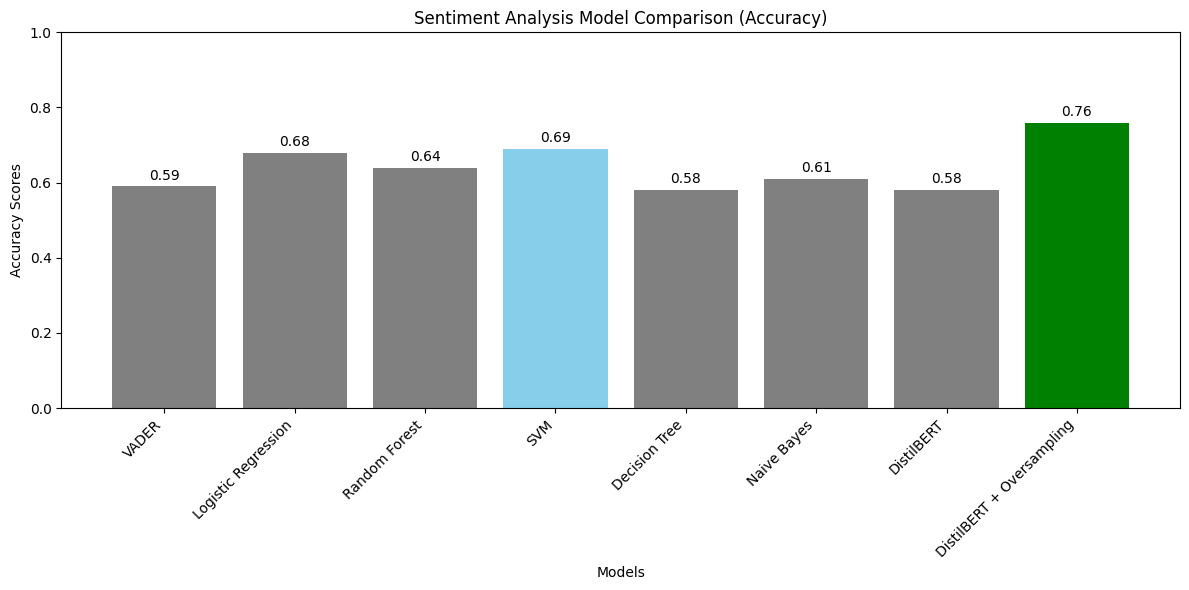

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = [
    "VADER", "Logistic Regression", "Random Forest", "SVM", "Decision Tree", "Naive Bayes", 
     "DistilBERT", "DistilBERT + Oversampling", 
]

# Corresponding accuracies
accuracies = [0.59, 0.68, 0.64, 0.69, 0.58, 0.61, 0.58, 0.76]

# Identify indices for highest and second highest
sorted_indices = sorted(range(len(accuracies)), key=lambda i: accuracies[i], reverse=True)
highest_idx = sorted_indices[0]
second_highest_idx = sorted_indices[1]

# Set colors
colors = ['gray'] * len(accuracies)
colors[highest_idx] = 'green'
colors[second_highest_idx] = 'skyblue'

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies, color=colors)
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Sentiment Analysis Model Comparison (Accuracy)')
plt.xticks(rotation=45, ha='right')

# Add accuracy labels on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [132]:
import torch.nn.functional as F

# Extract sentiment scores for test set
model.eval()
sentiment_scores = []
with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch
        inputs = {k: v.to(device) for k, v in inputs.items()}
        labels = labels.to(device)

        # Get the model outputs (logits)
        outputs = model(**inputs)
        logits = outputs.logits

        # Apply softmax to convert logits to probabilities
        probabilities = F.softmax(logits, dim=1)

        # Get the probability of class 1 (positive sentiment)
        positive_sentiment_score = probabilities[:, 1].cpu().numpy()

        sentiment_scores.extend(positive_sentiment_score)

# Now you have sentiment scores for each test sample in the 'sentiment_scores' list


In [133]:
import pandas as pd

# Assuming you have sentiment_scores as a list of scores for the test set
sentiment_df = pd.DataFrame({
    'cleaned_review': X_test_texts,  # the cleaned reviews from your test set
    'actual_sentiment': y_test,  # the true labels for sentiment (0 or 1)
    'predicted_sentiment_score': sentiment_scores  # the sentiment scores (probability of positive sentiment)
})

# Display the DataFrame
print(sentiment_df.head())


                                      cleaned_review  actual_sentiment  \
0  hard know write movie like room one hand certa...                 1   
1  watched last night likeed dark creepy scary th...                 0   
2  chinatown often sited one best written films t...                 1   
3  september four planes hijacked one planes unit...                 1   
4  batfriend never really captivated ive seen bat...                 1   

   predicted_sentiment_score  
0                   0.992222  
1                   0.007194  
2                   0.992382  
3                   0.918732  
4                   0.990834  


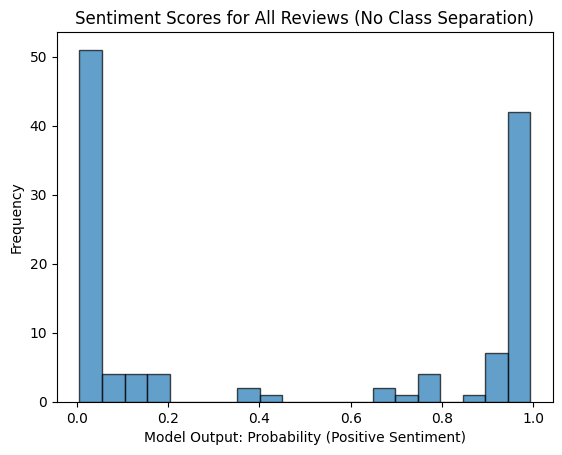

In [137]:
import matplotlib.pyplot as plt

# Plot a histogram to visualize the sentiment score distribution
plt.hist(sentiment_df['predicted_sentiment_score'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Model Output: Probability (Positive Sentiment)')
plt.title('Sentiment Scores for All Reviews (No Class Separation)')

plt.ylabel('Frequency')
plt.show()


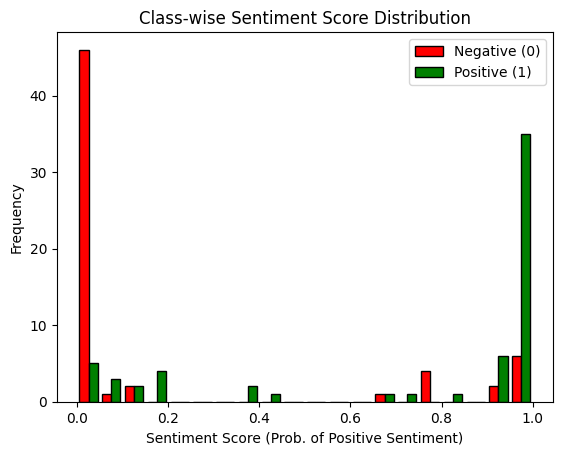

In [136]:
import matplotlib.pyplot as plt
import numpy as np

# Define bins
bins = np.linspace(0, 1, 21)  # 20 bins from 0 to 1

# Get histogram data (counts per bin)
neg_hist, _ = np.histogram(neg_scores, bins=bins)
pos_hist, _ = np.histogram(pos_scores, bins=bins)

# Calculate the bar width and positions
bar_width = 0.02
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plot side-by-side bars
plt.bar(bin_centers - bar_width/2, neg_hist, width=bar_width, label='Negative (0)', color='red', edgecolor='k')
plt.bar(bin_centers + bar_width/2, pos_hist, width=bar_width, label='Positive (1)', color='green', edgecolor='k')

plt.title('Class-wise Sentiment Score Distribution')
plt.xlabel('Sentiment Score (Prob. of Positive Sentiment)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [253]:
sample_data_unique = sample_data_unique.merge(
    merged_df[['movie_name_clean', 'description']],
    left_on='movie_name_clean',  # from sample_data_unique
    right_on='movie_name_clean',       # from merged_df
    how='left'
)

In [139]:
print(df.columns)

print(merged_df.columns)

Index(['cleaned_review', 'actual_sentiment'], dtype='object')
Index(['username', 'user_rating', 'helpful', 'total', 'review_title', 'review',
       'movie_name_clean', 'year', 'run_length', 'genres', 'imdb_rating',
       'num_raters', 'num_reviews', 'description', 'genres_clean',
       'cleaned_description', 'sentiment', 'avg_rating'],
      dtype='object')


In [239]:
sample_data_unique.shape

(500, 7)

In [240]:
# Number of unique values
print(sample_data_unique['movie_name_clean'].nunique())


345


In [242]:
# Check how many duplicate rows are present
num_duplicates = sample_data_unique.duplicated().sum()

print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


In [150]:
import torch
import numpy as np

def predict_sentiment_for_reviews(model, tokenizer, texts, batch_size=8):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    all_preds = []

    with torch.no_grad():
        for i in range(0, len(texts), batch_size):
            batch_texts = texts[i:i+batch_size]
            encodings = tokenizer(batch_texts, padding=True, truncation=True, max_length=128, return_tensors="pt")
            encodings = {k: v.to(device) for k, v in encodings.items()}
            outputs = model(**encodings)
            preds = torch.argmax(outputs.logits, dim=1)
            all_preds.extend(preds.cpu().numpy())

    return np.array(all_preds)

# Predict sentiment for all reviews in the dataset
df = df.copy()
df['predicted_sentiment'] = predict_sentiment_for_reviews(
    model, tokenizer, df['cleaned_review'].tolist()
)


In [167]:
# Group by movie and calculate average sentiment score
sentiment_scores = df.groupby('movie_name_clean')['predicted_sentiment'].mean().reset_index()
sentiment_scores.columns = ['movie_name_clean', 'avg_sentiment']


In [195]:
# Merge sentiment scores with hybrid recommendations
enhanced_hybrid = hybrid_recs.merge(sentiment_scores, on='movie_name_clean', how='left')

# Handle any missing values (if any movies have no reviews)
enhanced_hybrid['avg_sentiment'] = enhanced_hybrid['avg_sentiment'].fillna(0.5)  # neutral default

# Normalize sentiment score between 0 and 1
min_sent = enhanced_hybrid['avg_sentiment'].min()
max_sent = enhanced_hybrid['avg_sentiment'].max()

enhanced_hybrid['normalized_sentiment'] = (enhanced_hybrid['avg_sentiment'] - min_sent) / (max_sent - min_sent + 1e-8)


In [238]:
# Tune these weights to control influence of sentiment
alpha = 0.99  # weight for original hybrid score
beta = 0.01   # weight for sentiment score

enhanced_hybrid['final_score'] = (
    alpha * enhanced_hybrid['hybrid_score'] + beta * enhanced_hybrid['normalized_sentiment']
)
# Scale final_score to 1–10 range for fair comparison
min_score = enhanced_hybrid['final_score'].min()
max_score = enhanced_hybrid['final_score'].max()
enhanced_hybrid['final_score_scaled'] = 1 + 9 * (enhanced_hybrid['final_score'] - min_score) / (max_score - min_score + 1e-8)

# Sort by final score
enhanced_hybrid = enhanced_hybrid.sort_values(by='final_score', ascending=True).reset_index(drop=True)


In [239]:
# Show top recommendations
print(enhanced_hybrid[['movie_name_clean', 'hybrid_score', 'normalized_sentiment', 'final_score']].head())

# Optional: Save to CSV
# enhanced_hybrid.to_csv('enhanced_hybrid_with_sentiment.csv', index=False)


                movie_name_clean  hybrid_score  normalized_sentiment  \
0                  the big short      0.823405                   0.5   
1                         jackie      0.824705                   0.5   
2               lords of dogtown      0.820950                   1.0   
3                   molly's game      0.835272                   0.5   
4  the greatest game ever played      0.847549                   0.0   

   final_score  
0     0.820171  
1     0.821458  
2     0.822741  
3     0.831919  
4     0.839074  


In [240]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Merge true ratings (e.g., from final_merged_data) into enhanced_hybrid
rating_df = df[['movie_name_clean', 'user_rating']].drop_duplicates()
evaluation_df = enhanced_hybrid.merge(rating_df, on='movie_name_clean', how='inner')

rmse = np.sqrt(mean_squared_error(evaluation_df['user_rating'], evaluation_df['final_score_scaled']))
mae = mean_absolute_error(evaluation_df['user_rating'], evaluation_df['final_score_scaled'])

print(f"\n📊 Evaluation:\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}")



📊 Evaluation:
RMSE: 3.0981
MAE: 2.4540


In [241]:
# Scale hybrid_score as well
min_h = hybrid_recs['hybrid_score'].min()
max_h = hybrid_recs['hybrid_score'].max()
hybrid_recs['hybrid_score_scaled'] = 1 + 9 * (hybrid_recs['hybrid_score'] - min_h) / (max_h - min_h + 1e-8)

# Merge and evaluate
eval_baseline = hybrid_recs.merge(rating_df, on='movie_name_clean', how='inner')

rmse_baseline = np.sqrt(mean_squared_error(eval_baseline['user_rating'], eval_baseline['hybrid_score_scaled']))
mae_baseline = mean_absolute_error(eval_baseline['user_rating'], eval_baseline['hybrid_score_scaled'])

print(f"\n📊 Baseline Evaluation (Without Sentiment):\nRMSE: {rmse_baseline:.4f}\nMAE: {mae_baseline:.4f}")



📊 Baseline Evaluation (Without Sentiment):
RMSE: 3.1481
MAE: 2.4891


In [165]:

print(sample_data_unique.columns)
#df.rename(columns={"predicted_sentiment_x": "predicted_sentiment"}, inplace=True)
df.drop(columns=['actual_sentiment_x'], inplace=True)
df.rename(columns={"actual_sentiment_y": "actual_sentiment"}, inplace=True)
print(df.columns)

Index(['movie_name_clean', 'cleaned_review', 'r_sentiment_score',
       'predicted_sentiment', 'avg_rating', 'user_rating', 'actual_sentiment'],
      dtype='object')
Index(['cleaned_review', 'predicted_sentiment', 'movie_name_clean',
       'r_sentiment_score', 'predicted_sentiment_y', 'avg_rating',
       'user_rating', 'actual_sentiment'],
      dtype='object')


In [158]:
df = df.merge(sample_data_unique, on="cleaned_review", how="left")

In [162]:
sample_data_unique.head()

,movie_name_clean,cleaned_review,r_sentiment_score,predicted_sentiment,avg_rating,user_rating,actual_sentiment
0,fifty shades of grey,wonderful film lovers perhaps know little bit ...,0.9942,Positive,5.092359,4.0,0
1,it's a wonderful life,movie making approachenlightening educating si...,0.9801,Positive,9.032663,9.0,1
2,inception,one rate balance properly fanatic reviews good...,0.9766,Positive,8.018560,1.0,1
3,the dark knight rises,nolan one lucky filmmaker always enjoying big ...,0.9037,Positive,7.664803,4.0,1
4,gran torino,nicely times beautifully photographed movie ac...,-0.9902,Negative,7.666306,1.0,1


In [166]:
df.head()

,cleaned_review,predicted_sentiment,movie_name_clean,r_sentiment_score,predicted_sentiment_y,avg_rating,user_rating,actual_sentiment
0,truly one best movies seen far yeari didnt kno...,1,black hawk down,0.7430,Positive,7.573333,10.0,1
1,tim burtons videos dark sure wonderful job mix...,1,corpse bride,0.2957,Positive,7.475510,10.0,1
2,wonderful masterpiece movie keeps glued seat p...,1,the machinist,0.6872,Positive,7.535787,9.0,1
3,adventure flick mixes western movie formula sp...,1,raiders of the lost ark,0.9545,Positive,8.966013,3.0,1
4,actors movie give heartpounding performance ha...,1,american history x,0.6486,Positive,8.637987,10.0,1
